# PyBDSF catalog analysis

### The aim is to explore the data of the LoTSS DR2

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from data_prep import *

Execute only once :

In [2]:
data_prep()

Reading the catalog...
Insight :
                      Source_Name         RA   E_RA       DEC  E_DEC  \
0        ILTJ112142.68+465542.0   170.42784   0.53  46.92836   0.35   
1        ILTJ112144.88+471503.6   170.43698   0.34  47.25103   0.25   
2        ILTJ112142.41+465914.9   170.42669   0.64  46.98749   0.94   
3        ILTJ112143.64+472024.4   170.43183   0.45  47.34012   0.38   
4        ILTJ112141.23+470640.0   170.42181   0.60  47.11112   0.28   
...                          ...        ...    ...       ...    ...   
4396223  ILTJ182657.69+353633.3   276.74037  15.05  35.60926  19.86   
4396224  ILTJ182606.35+351917.9   276.52646  19.94  35.32166  18.45   
4396225  ILTJ182552.31+335432.5   276.46797  17.72  33.90904  21.41   
4396226  ILTJ182453.39+341352.2   276.22245  11.27  34.23117   7.57   
4396227  ILTJ182409.84+351625.1   276.04100   8.87  35.27365   7.75   

         Peak_flux  EPeakflux  Total_flux  ETotalflux    Maj  ...  EDCMin  \
0            0.699      0.108       

In [3]:
%more Info

In [4]:
names = np.load("npzdata/names.npz", allow_pickle=True)
flux = np.load("npzdata/flux.npz")
dim = np.load("npzdata/dim.npz")
mosaic = np.load("npzdata/mosaic.npz", allow_pickle=True)
pos = np.load("npzdata/positions.npz")
#Pos_angle = np.load("npzdata/PA.npz")

In [5]:
#names
Source_Name = names["Source_Name"]

#Positions
RA = pos["RA"]
#E_RA = pos["E_RA"]
DEC = pos["DEC"]
#E_DEC = pos["E_DEC"]

#flux
#Peak_flux = flux["Peak_flux"]
#EPeakflux = flux["EPeakflux"]
Total_flux = flux["Total_flux"]
#ETotalflux = flux["ETotalflux"]

#dim
Maj = dim["Maj"]
#E_Maj = dim["E_Maj"]
Min = dim["Min"]
#E_Min = dim["E_Min"]
DC_Maj = dim["DC_Maj"]
#EDCMaj = dim["EDCMaj"]
DC_Min = dim["DC_Min"]
#EDCMin = dim["EDCMin"]

#Pos_angle
#PA = Pos_angle["PA"]
#E_PA = Pos_angle["E_PA"]
#DC_PA = Pos_angle["DC_PA"]
#EDCPA = Pos_angle["EDCPA"]

#mosaic
#Isl_rms = mosaic["Isl_rms"]
S_Code = mosaic["S_Code"]
#Mosaic_ID = mosaic["Mosaic_ID"
Number_Pointings = mosaic["Number_Pointings"]
#Masked_Fraction = mosaic["Masked_Fraction"]

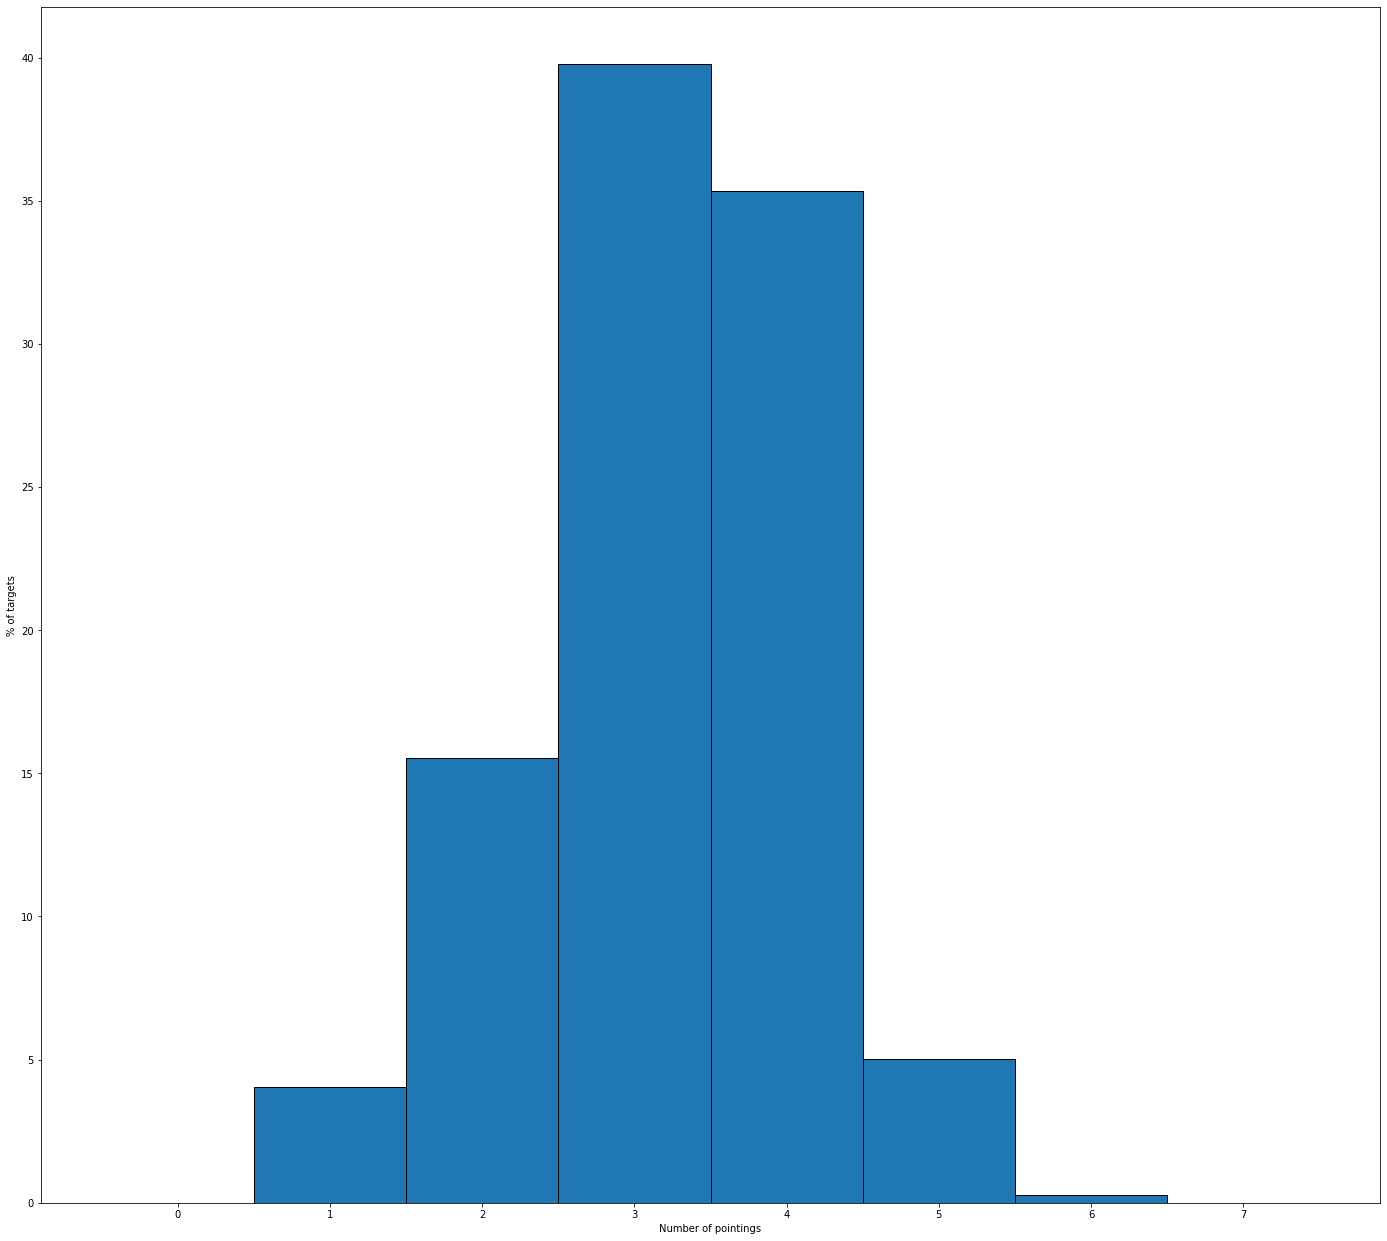

In [6]:
m_bins = np.arange(Number_Pointings.min(),Number_Pointings.max()+2)

hist, _ = np.histogram(Number_Pointings, bins=m_bins)
m_norm_hist = 100*hist/len(Number_Pointings)

plt.figure(figsize=(24,22))
plt.bar(m_bins[:-1],m_norm_hist, edgecolor='black', width=1)
plt.xlabel("Number of pointings")
plt.ylabel("% of targets")
#plt.savefig("fig/nb_pointings.pdf")
plt.show()

In [7]:
resolution = 12
resolved_targ = 100.*len(Maj[Maj>resolution])/len(Maj)
#Convolved
print("{:.3} % of the target are resolved (not point-like source)".format(resolved_targ))

14.2 % of the target are resolved (not point-like source)


In [8]:
resolution = 12
resolved_targ = 100.*len(DC_Maj[DC_Maj>resolution])/len(Maj)
#De-convolved
print("{:.3} % of the target are resolved (not point-like source)".format(resolved_targ))

10.8 % of the target are resolved (not point-like source)


In [9]:
nbins1 = 100
nbins2 = 5000

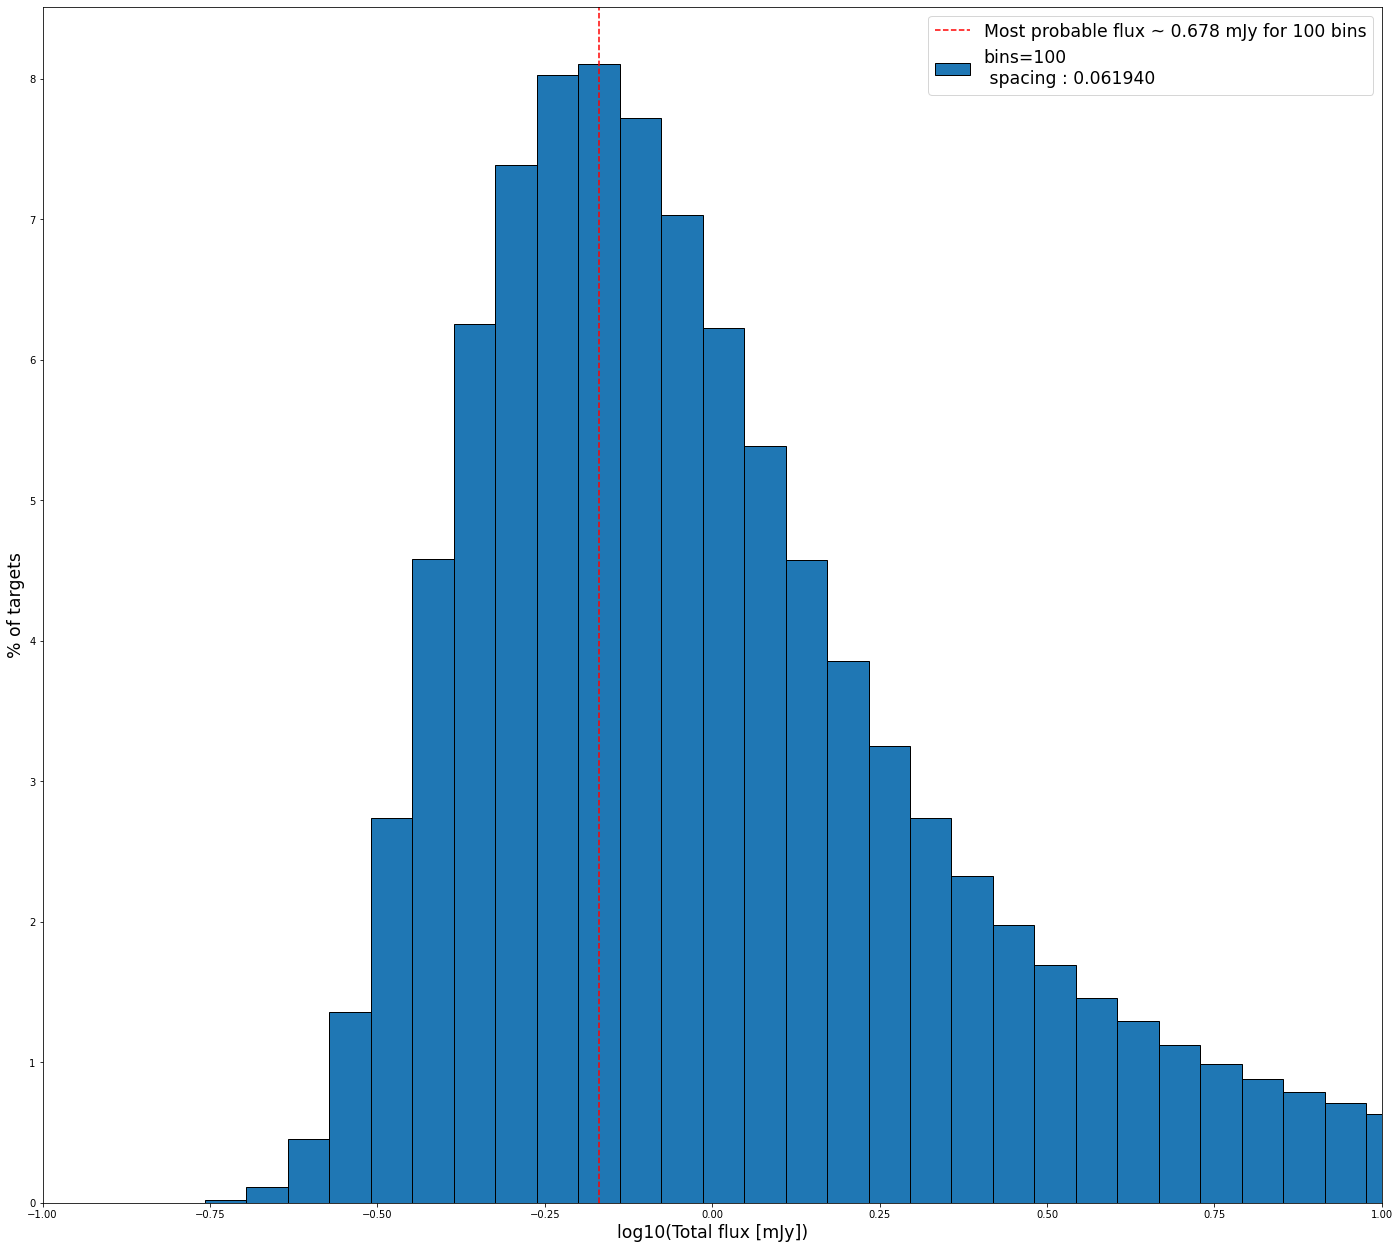

In [10]:
hist1, bin_edges1 = np.histogram(np.log10(Total_flux), nbins1)
norm_hist1 = 100*hist1/len(Total_flux)
val_max1 = bin_edges1[:-1][norm_hist1==norm_hist1.max()]

plt.figure(figsize=(24,22))
plt.bar(bin_edges1[:-1],norm_hist1, edgecolor='black', width=(bin_edges1[1:]-bin_edges1[:-1]).mean(), label='bins=%d\n spacing : %f'%(nbins1, bin_edges1[1]-bin_edges1[0]))
plt.axvline(val_max1, ls='--', c='r', label='Most probable flux ~ %.3f mJy for %d bins'%(10**val_max1, nbins1))
plt.xlim((-1,1))
plt.xlabel("log10(Total flux [mJy])", size='xx-large')
plt.ylabel("% of targets", size='xx-large')
plt.legend(fontsize="xx-large")
#plt.savefig('fig/flux_hist_1.pdf')
plt.show()

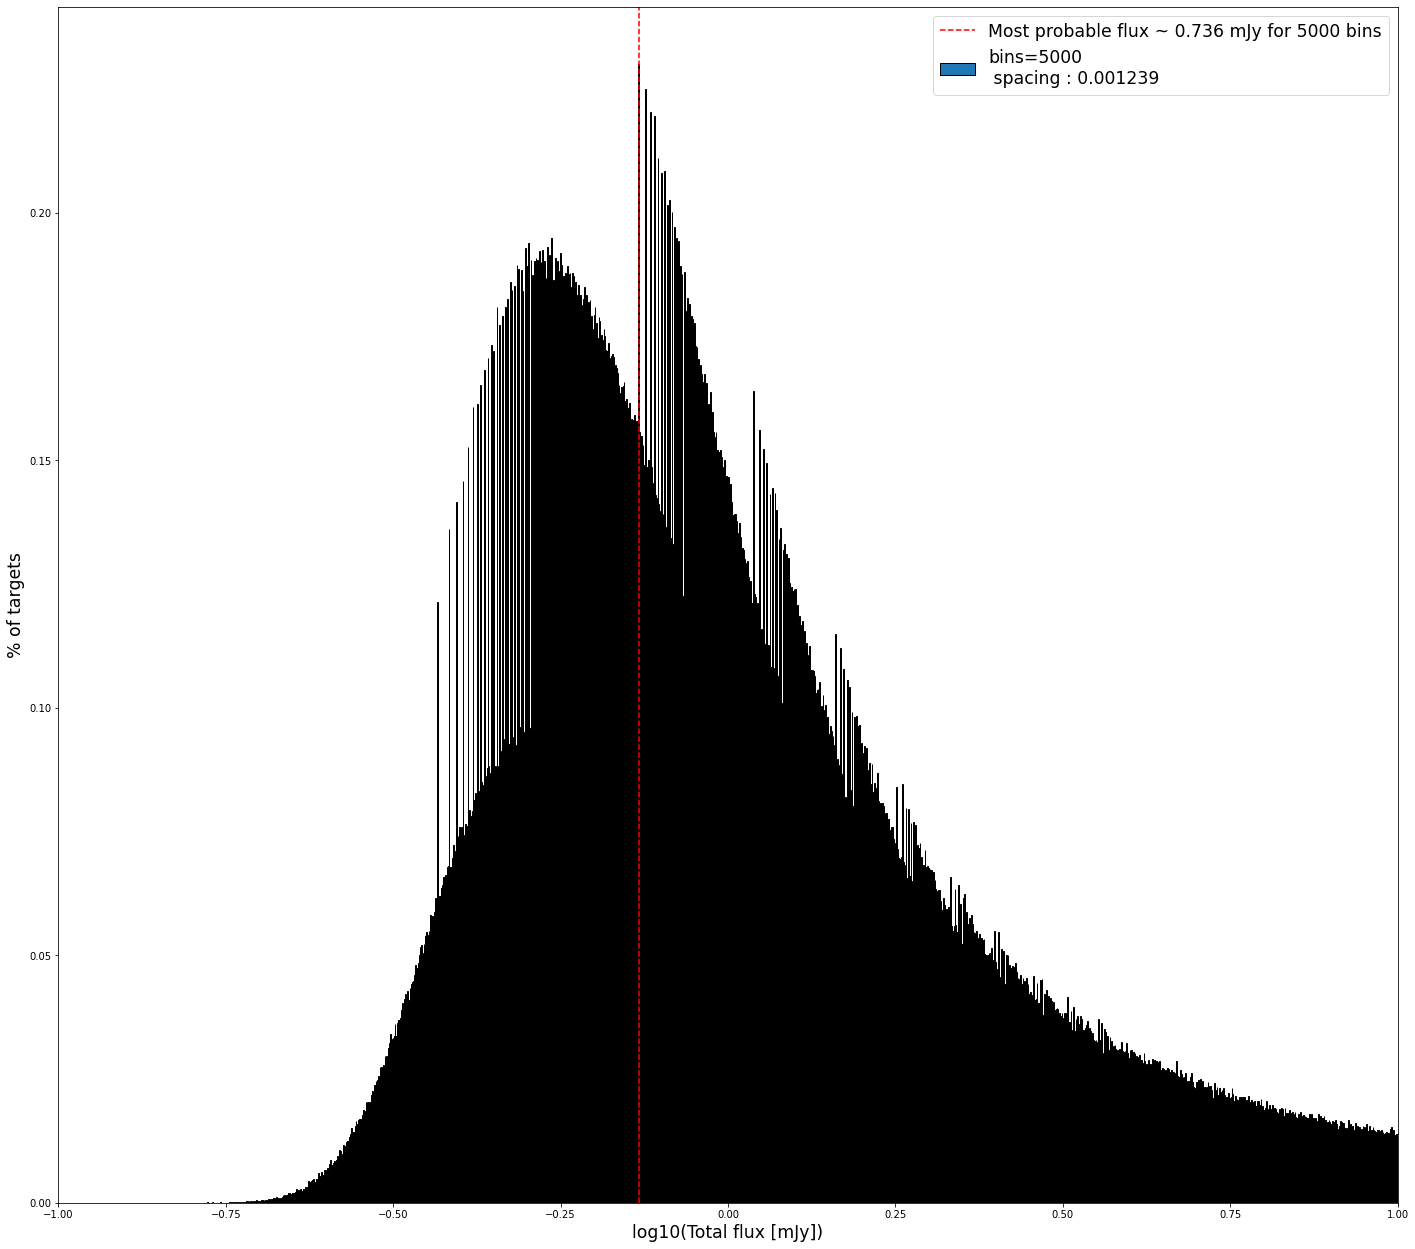

In [11]:
hist2, bin_edges2 = np.histogram(np.log10(Total_flux), nbins2)
norm_hist2 = 100*hist2/len(Total_flux)
val_max2 = bin_edges2[:-1][norm_hist2==norm_hist2.max()]

plt.figure(figsize=(24,22))
plt.bar(bin_edges2[:-1],norm_hist2, edgecolor='black', width=(bin_edges2[1:]-bin_edges2[:-1]).mean(), label='bins=%d\n spacing : %f'%(nbins2, bin_edges2[1]-bin_edges2[0]))
plt.axvline(val_max2, ls='--', c='r', label='Most probable flux ~ %.3f mJy for %d bins'%(10**val_max2, nbins2))
plt.xlim((-1,1))
plt.xlabel("log10(Total flux [mJy])", size='xx-large')
plt.ylabel("% of targets", size='xx-large')
plt.legend(fontsize="xx-large")
#plt.savefig('fig/flux_hist_3.pdf')
plt.show()

In [12]:
bins_x = 10**(np.linspace(np.log10(Maj.min()), np.log10(Maj.max()), 200))
bins_y = 10**(np.linspace(np.log10(Total_flux).min(), np.log10(Total_flux).max(), 200))

In [13]:
H, xedges, yedges = np.histogram2d(Maj, Total_flux, bins=[bins_x, bins_y])
X, Y = np.meshgrid(xedges, yedges)

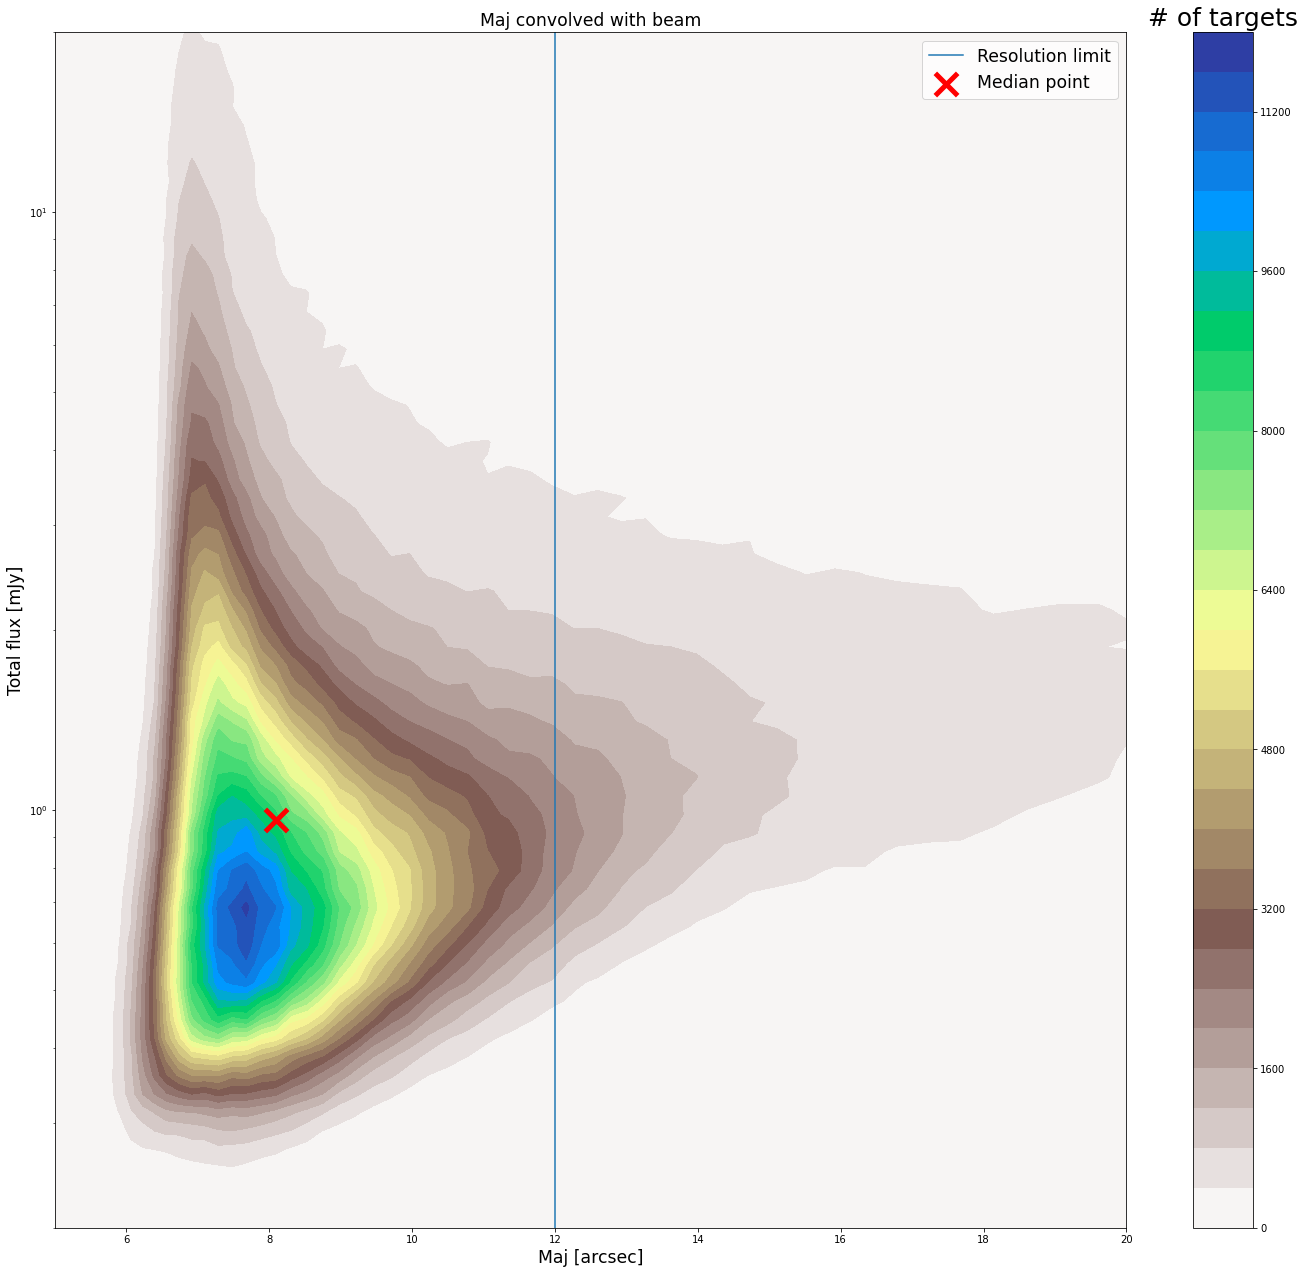

In [14]:
plt.figure(figsize=(24,22))
#plt.scatter(np.log10(Maj), np.log10(Total_flux), c='r', s=50, alpha=0.01)
plt.contourf(X[1:,1:].T, (Y[1:,1:]).T, H, levels=30, cmap='terrain_r')
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.axvline((resolution), label="Resolution limit")
plt.scatter(np.median(Maj), np.median(Total_flux), marker='x', c='r', s=500, linewidth=5, label='Median point')
#plt.scatter((X[1:,1:]).T[H==H.max()], (Y[1:,1:]).T[H==H.max()], marker='x', c='black', s=500, label='Maximum density :\nFlux ~ %.2f mJy\nMaj ~ %.2f "'%((X[1:,1:]).T[H==H.max()],(Y[1:,1:]).T[H==H.max()]))
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Total flux [mJy]", size='xx-large')
plt.legend(fontsize="xx-large")
plt.yscale('log')
plt.xlim((5, 20))
plt.ylim((0.2,20))
plt.title("Maj convolved with beam", size='xx-large')
plt.savefig('fig/size_n_flux_3.pdf')
plt.show()

In [15]:
bins_dcmaj = 10**(np.linspace(np.log10(DC_Maj[DC_Maj!=0].min()), np.log10(DC_Maj[DC_Maj!=0].max()), 200))
bins_dcflux = 10**(np.linspace(np.log10(Total_flux[DC_Maj!=0]).min(), np.log10(Total_flux[DC_Maj!=0]).max(), 200))

In [16]:
Hdc, xedges, yedges = np.histogram2d(DC_Maj[DC_Maj!=0], Total_flux[DC_Maj!=0], bins=[bins_dcmaj, bins_dcflux])
Xdc, Ydc = np.meshgrid(xedges, yedges)

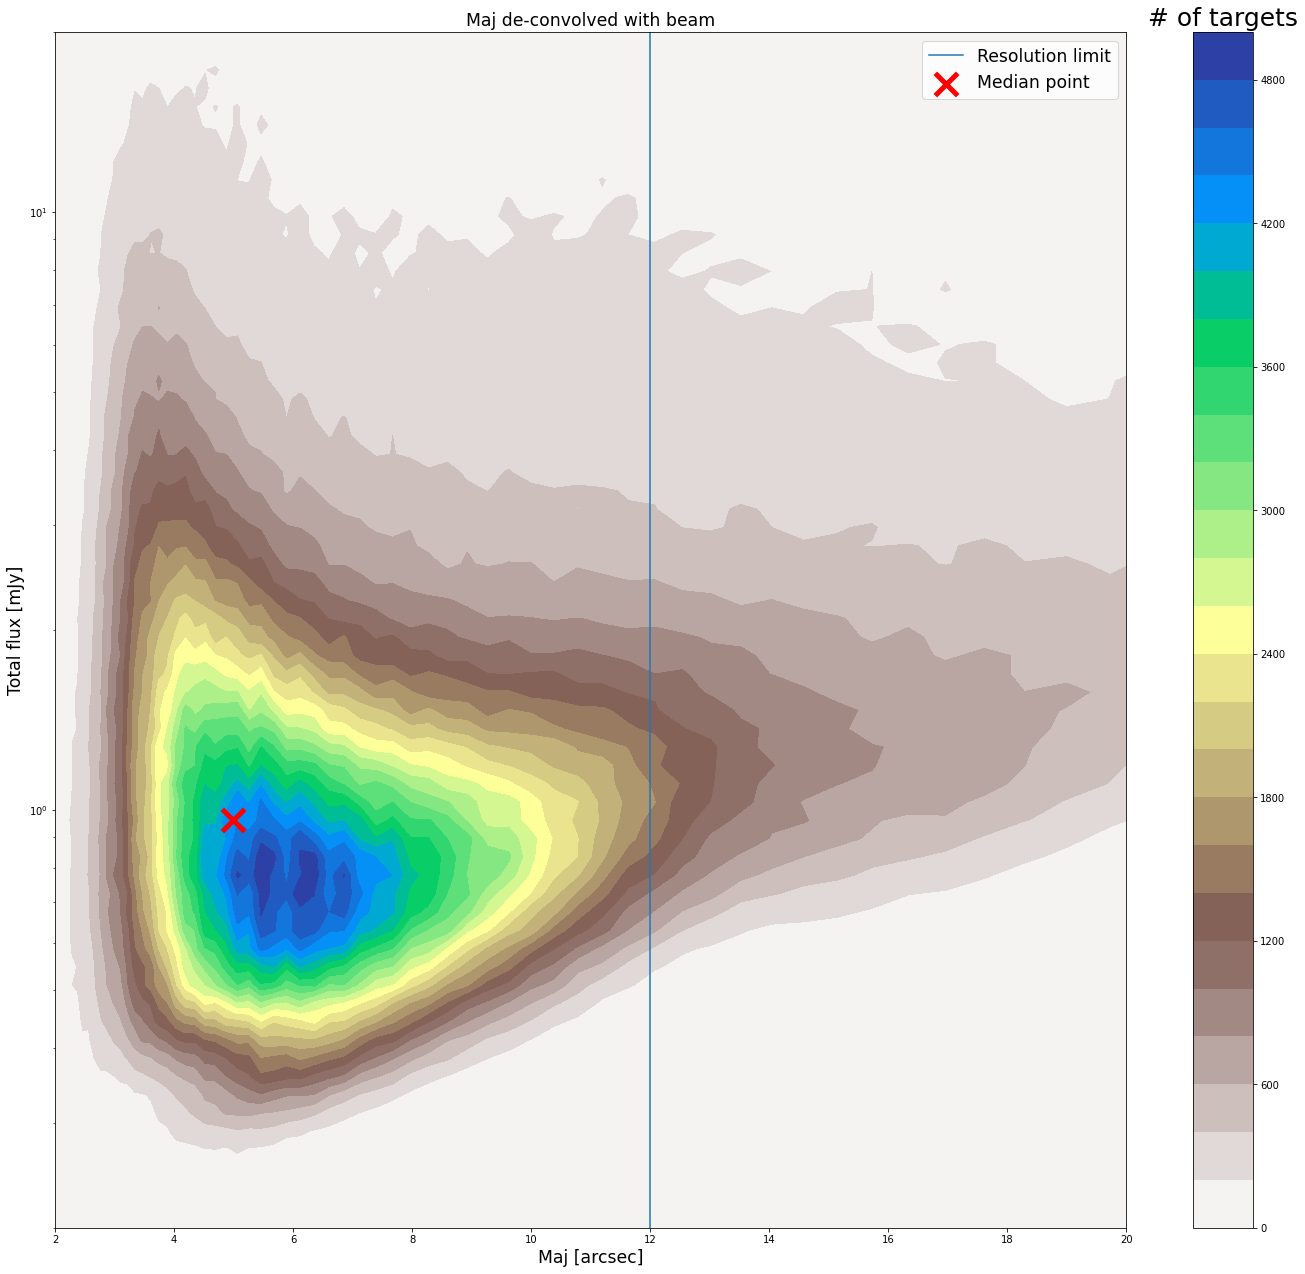

In [17]:
plt.figure(figsize=(24,22))
#plt.scatter(np.log10(Maj), np.log10(Total_flux), c='r', s=50, alpha=0.01)
plt.contourf(Xdc[1:,1:].T, (Ydc[1:,1:]).T, Hdc, levels=30, cmap='terrain_r')
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.axvline((resolution), label="Resolution limit")
plt.scatter(np.median(DC_Maj), np.median(Total_flux), marker='x', c='r', s=500, linewidth=5, label='Median point')
#plt.scatter((X[1:,1:]).T[H==H.max()], (Y[1:,1:]).T[H==H.max()], marker='x', c='black', s=500, label='Maximum density :\nFlux ~ %.2f mJy\nMaj ~ %.2f "'%((X[1:,1:]).T[H==H.max()],(Y[1:,1:]).T[H==H.max()]))
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Total flux [mJy]", size='xx-large')
plt.legend(fontsize="xx-large")
plt.yscale('log')
plt.xlim((2, 20))
plt.ylim((0.2,20))
plt.title("Maj de-convolved with beam", size='xx-large')
plt.savefig('fig/size_n_flux_3dc.pdf')
plt.show()

In [18]:
bins_min = np.linspace(Min.min(), Min.max(), 1000)
bins_maj = np.linspace(Maj.min(), Maj.max(), 1000)

In [19]:
Hist, xedges, yedges = np.histogram2d(Maj, Min, bins=[bins_maj, bins_min])
X_maj, Y_min = np.meshgrid(xedges, yedges)

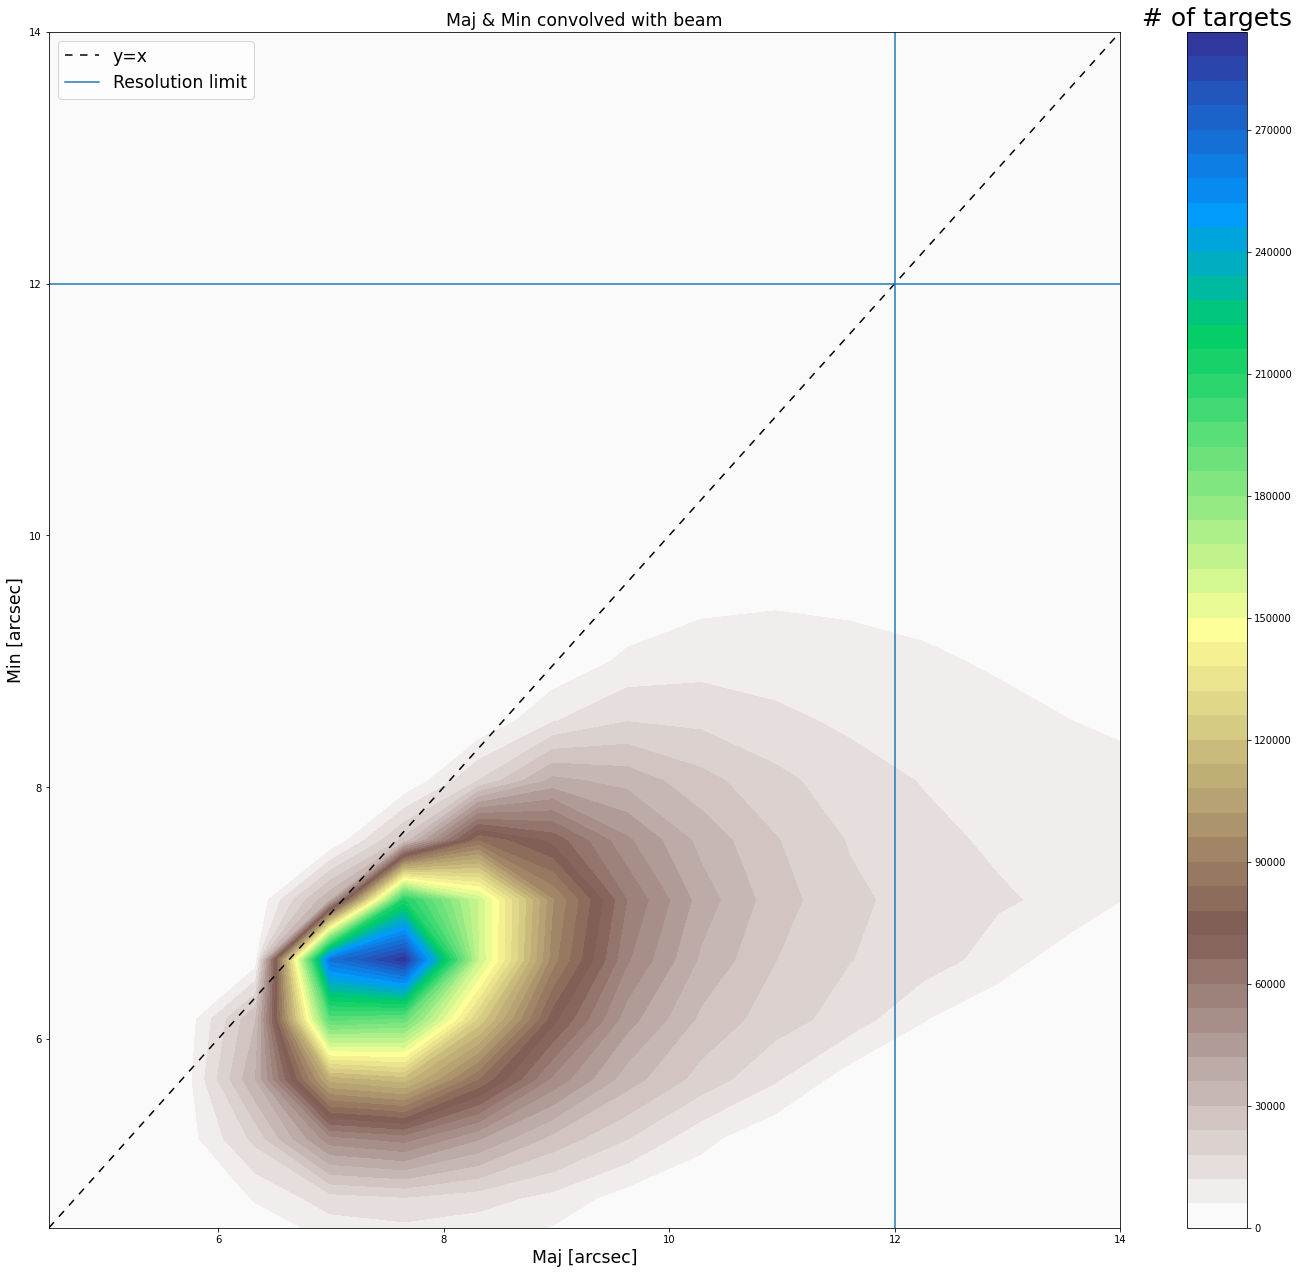

In [20]:
plt.figure(figsize=(24,22))
plt.contourf(X_maj[1:,1:].T, Y_min[1:,1:].T, Hist, cmap='terrain_r', levels=50)
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((4.5,14))
plt.ylim((4.5,14))
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
plt.legend(fontsize="xx-large")
plt.title("Maj & Min convolved with beam", size='xx-large')
#plt.savefig('fig/Maj_vs_min.pdf')
plt.show()

In [21]:
bins_min = np.linspace(Min.min(), Min.max(), 1000)
bins_maj = np.linspace(Maj.min(), Maj.max(), 1000)

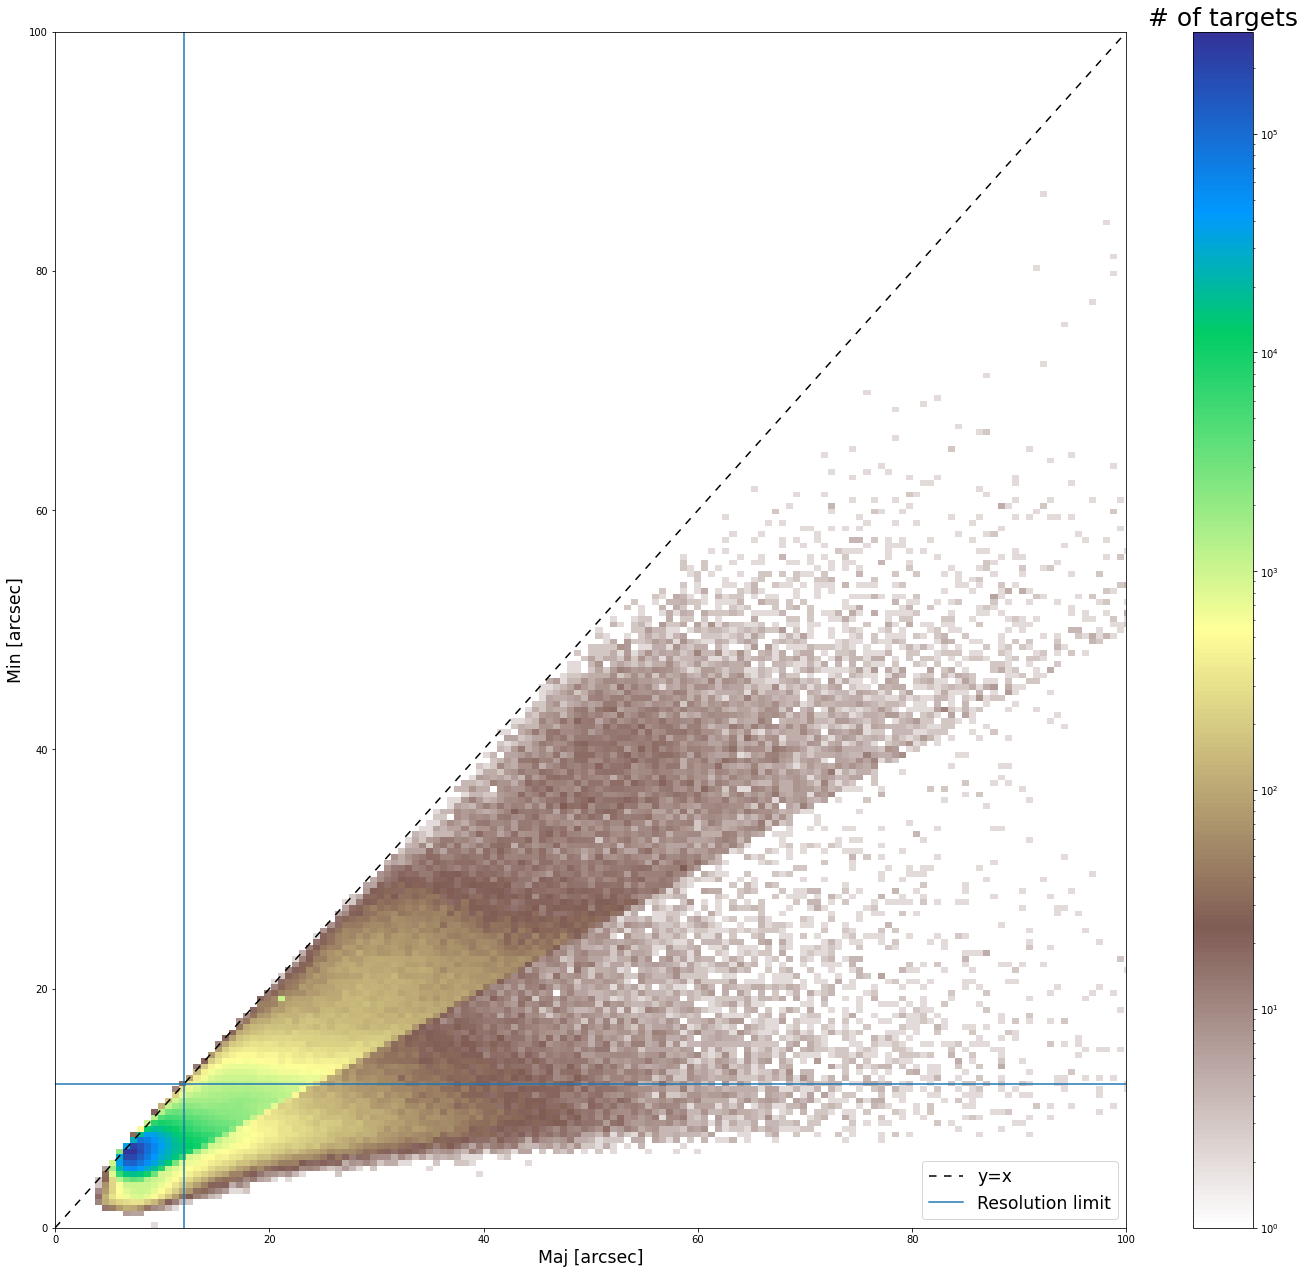

In [22]:
plt.figure(figsize=(24,22))
plt.hist2d(Maj, Min, bins=[bins_maj, bins_min], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,100))
plt.ylim((0,100))
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
plt.legend(fontsize="xx-large")
plt.savefig('fig/Maj_vs_min_hist.pdf')
plt.show()

In [23]:
bins_min_S = np.linspace(Min[S_Code=='S'].min(), Min[S_Code=='S'].max(), 1000)
bins_maj_S = np.linspace(Maj[S_Code=='S'].min(), Maj[S_Code=='S'].max(), 1000)

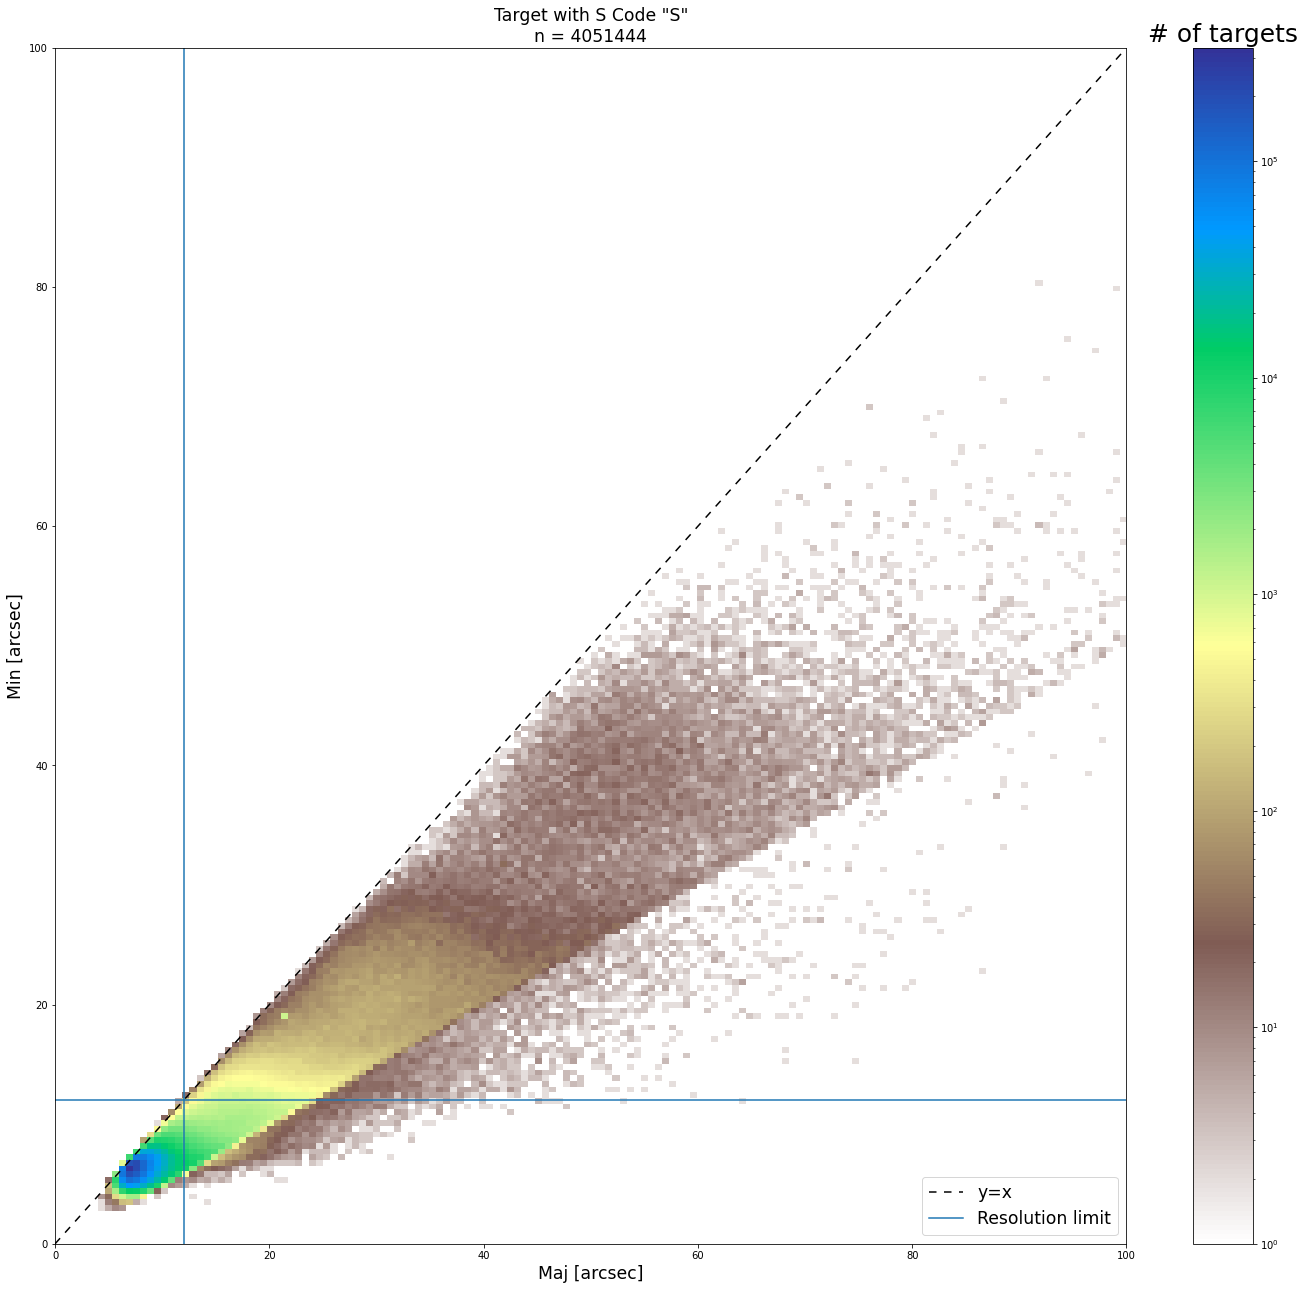

In [24]:
plt.figure(figsize=(24,22))
plt.hist2d(Maj[S_Code=='S'], Min[S_Code=='S'], bins=[bins_maj_S, bins_min_S], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.title('Target with S Code "S"\nn = %d'%(len(Maj[S_Code=='S'])), fontsize="xx-large")
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,100))
plt.ylim((0,100))
plt.legend(fontsize="xx-large")
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
#plt.savefig('fig/Maj_vs_min_hist.pdf')
plt.show()

In [25]:
bins_min_C = np.linspace(Min[S_Code=='C'].min(), Min[S_Code=='C'].max(), 50)
bins_maj_C = np.linspace(Maj[S_Code=='C'].min(), Maj[S_Code=='C'].max(), 50)

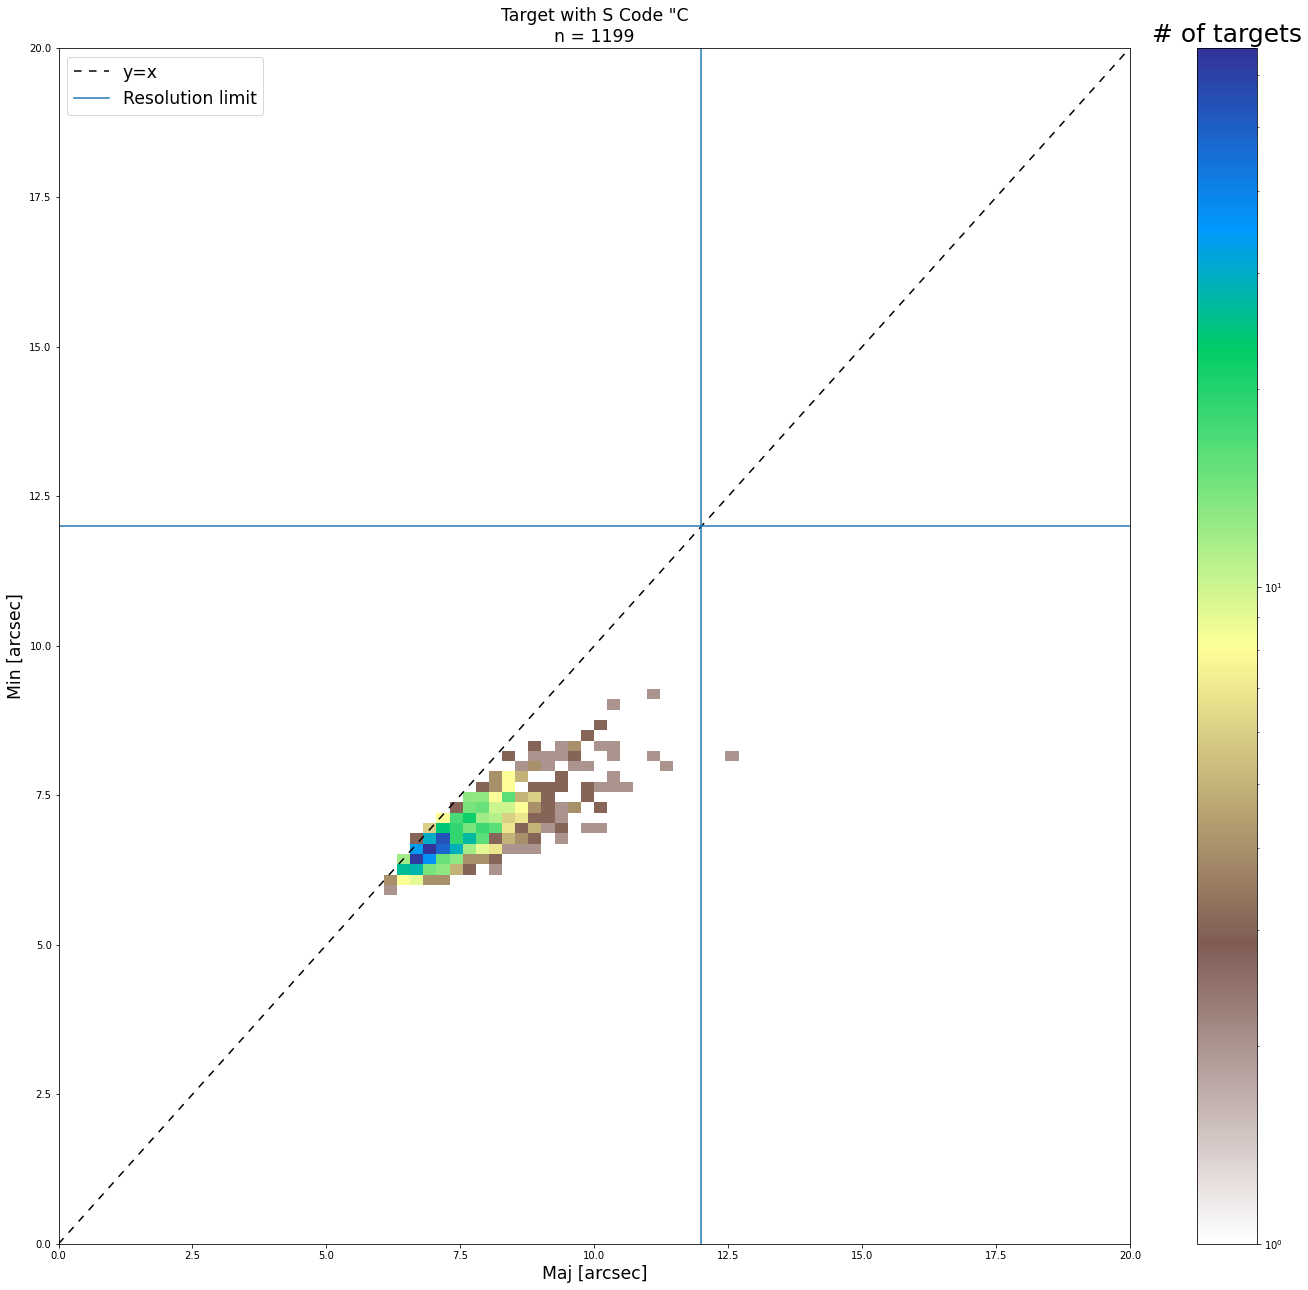

In [26]:
plt.figure(figsize=(24,22))
plt.hist2d(Maj[S_Code=='C'], Min[S_Code=='C'], bins=[bins_maj_C, bins_min_C], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.title('Target with S Code "C\nn = %d'%(len(Maj[S_Code=='C'])), fontsize="xx-large")
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,20))
plt.ylim((0,20))
plt.legend(fontsize="xx-large")
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
#plt.savefig('fig/Maj_vs_min_hist.pdf')
plt.show()

In [27]:
bins_min_M = np.linspace(Min[S_Code=='M'].min(), Min[S_Code=='M'].max(), 1000)
bins_maj_M = np.linspace(Maj[S_Code=='M'].min(), Maj[S_Code=='M'].max(), 1000)

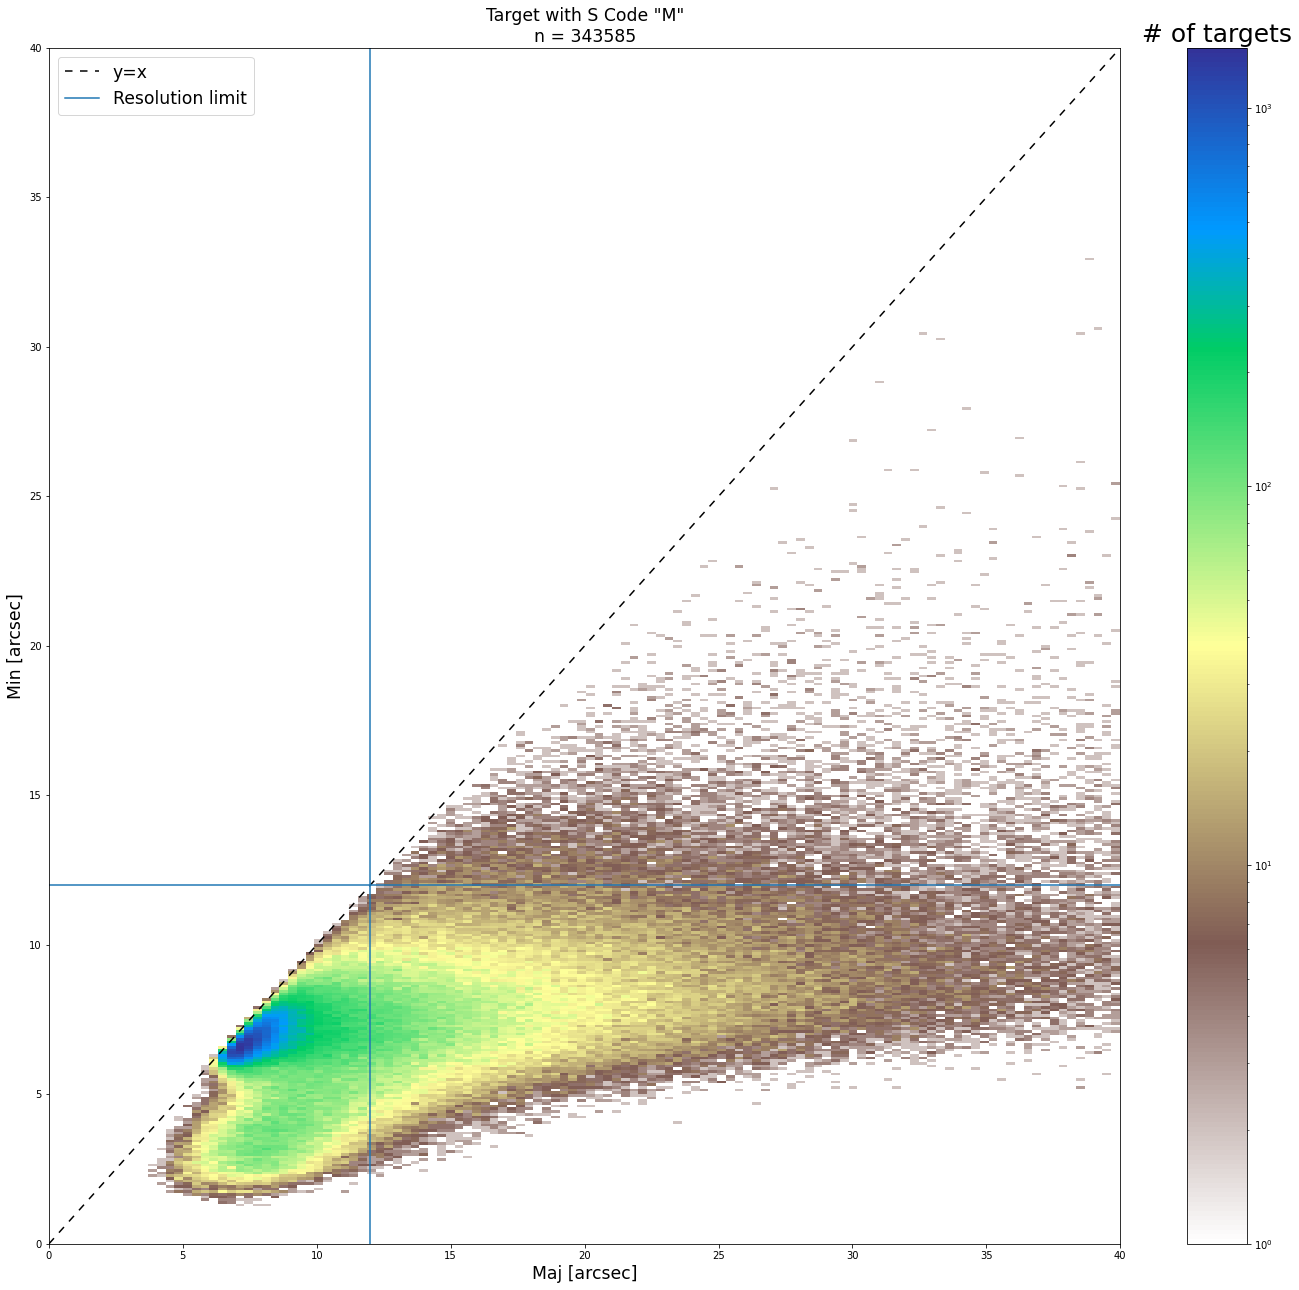

In [28]:
plt.figure(figsize=(24,22))
plt.hist2d(Maj[S_Code=='M'], Min[S_Code=='M'], bins=[bins_maj_M, bins_min_M], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.title('Target with S Code "M"\nn = %d'%(len(Maj[S_Code=='M'])), fontsize="xx-large")
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,40))
plt.ylim((0,40))
plt.legend(fontsize="xx-large")
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
#plt.savefig('fig/Maj_vs_min_hist.pdf')
plt.show()

In [29]:
select = np.logical_and(DC_Maj!=0, DC_Min!=0)

In [30]:
bins_dcmin = 10**(np.linspace(np.log10(DC_Min[select].min()), np.log10(Min[select].max()), 200))
bins_dcmaj = 10**(np.linspace(np.log10(DC_Maj[select].min()), np.log10(Maj[select].max()), 200))

In [31]:
Histdc, xedges, yedges = np.histogram2d(DC_Maj[select], DC_Min[select], bins=[bins_dcmaj, bins_dcmin])
X_dcmaj, Y_dcmin = np.meshgrid(xedges, yedges)

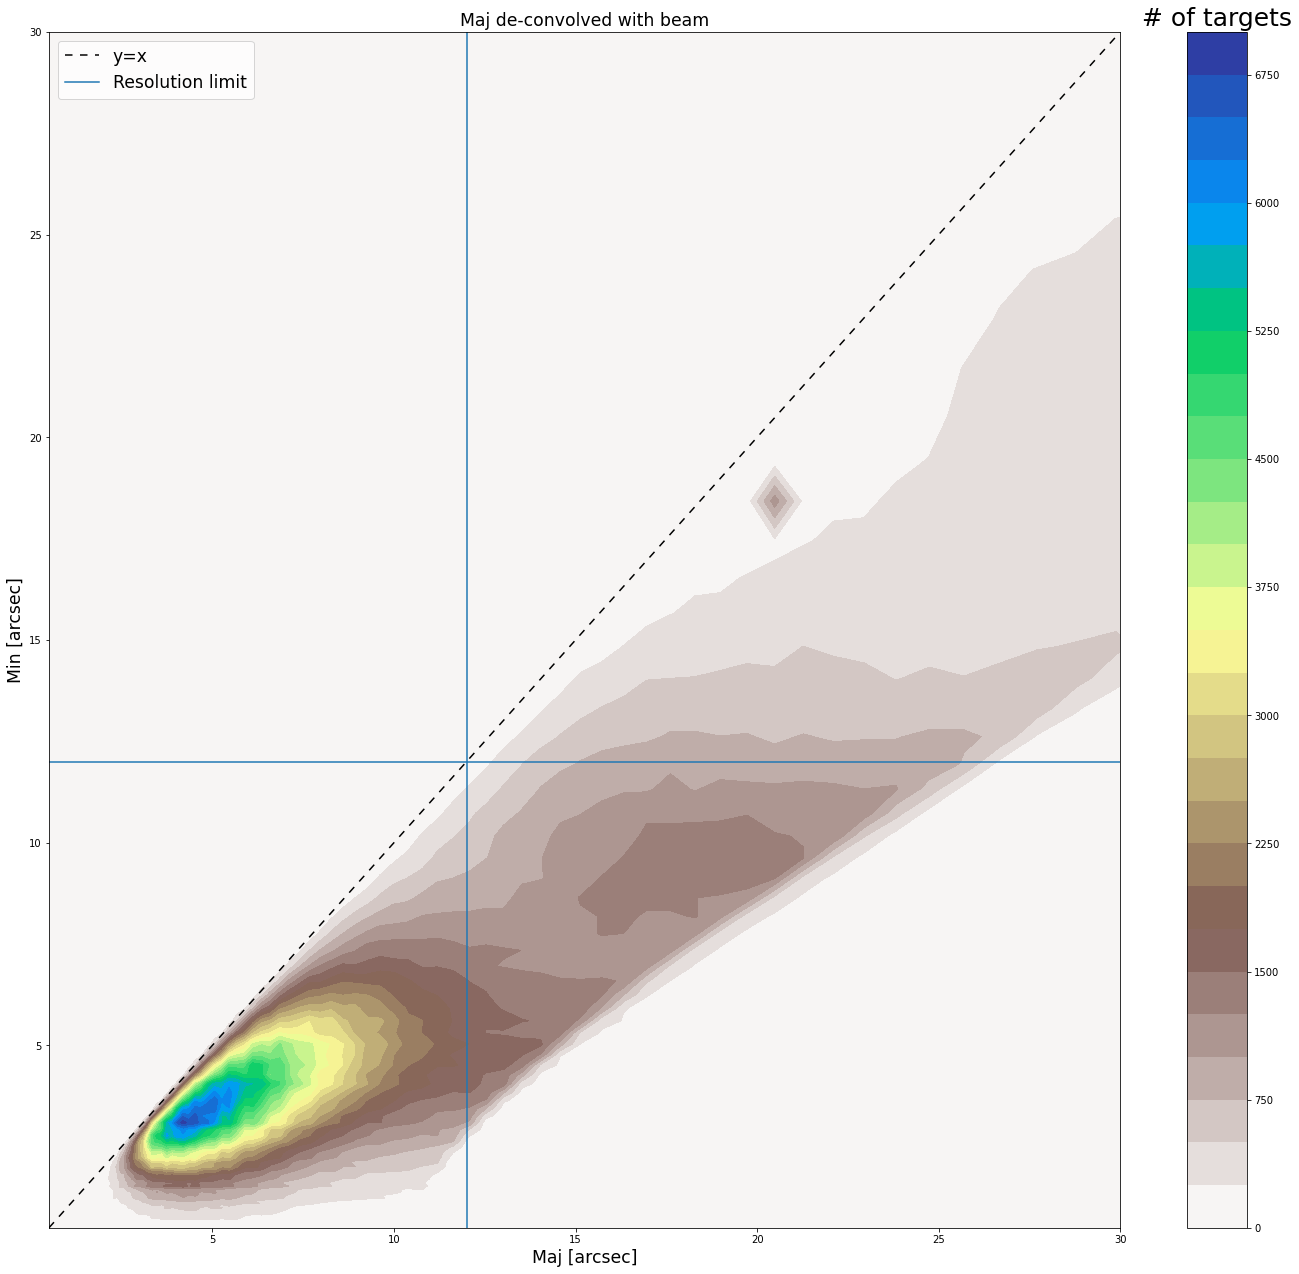

In [32]:
plt.figure(figsize=(24,22))
plt.contourf(X_dcmaj[1:,1:].T, Y_dcmin[1:,1:].T, Histdc, cmap='terrain_r', levels=30)
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0.5,30))
plt.ylim((0.5,30))
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
plt.legend(fontsize="xx-large")
plt.title("Maj de-convolved with beam", size='xx-large')
plt.savefig('fig/Maj_vs_min_dc.pdf')
plt.show()

In [33]:
bins_dcmin = np.linspace(Min.min(), Min.max(), 1000)
bins_dcmaj = np.linspace(Maj.min(), Maj.max(), 1000)

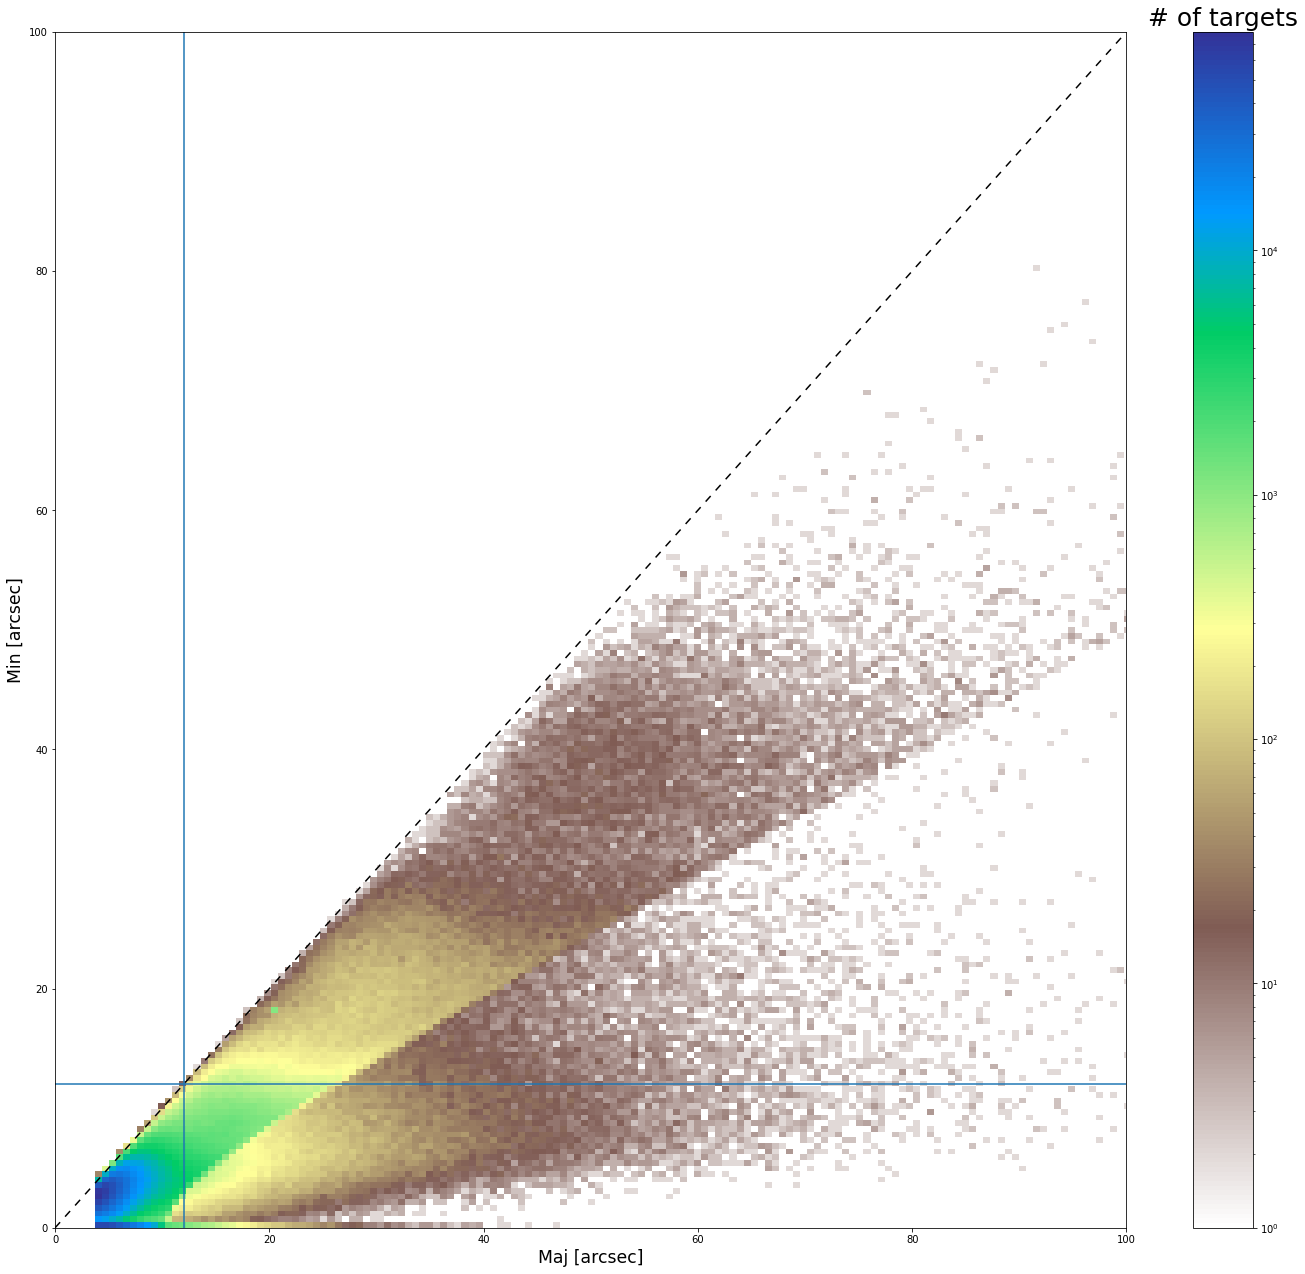

In [34]:
plt.figure(figsize=(24,22))
plt.hist2d(DC_Maj, DC_Min, bins=[bins_dcmaj, bins_dcmin], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,100))
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
plt.ylim((0,100))
plt.savefig('fig/dcMaj_vs_min_hist.pdf')
plt.show()

In [35]:
bins_dcmin_S = np.linspace(DC_Min[S_Code=='S'].min(), DC_Min[S_Code=='S'].max(), 1000)
bins_dcmaj_S = np.linspace(DC_Maj[S_Code=='S'].min(), DC_Maj[S_Code=='S'].max(), 1000)

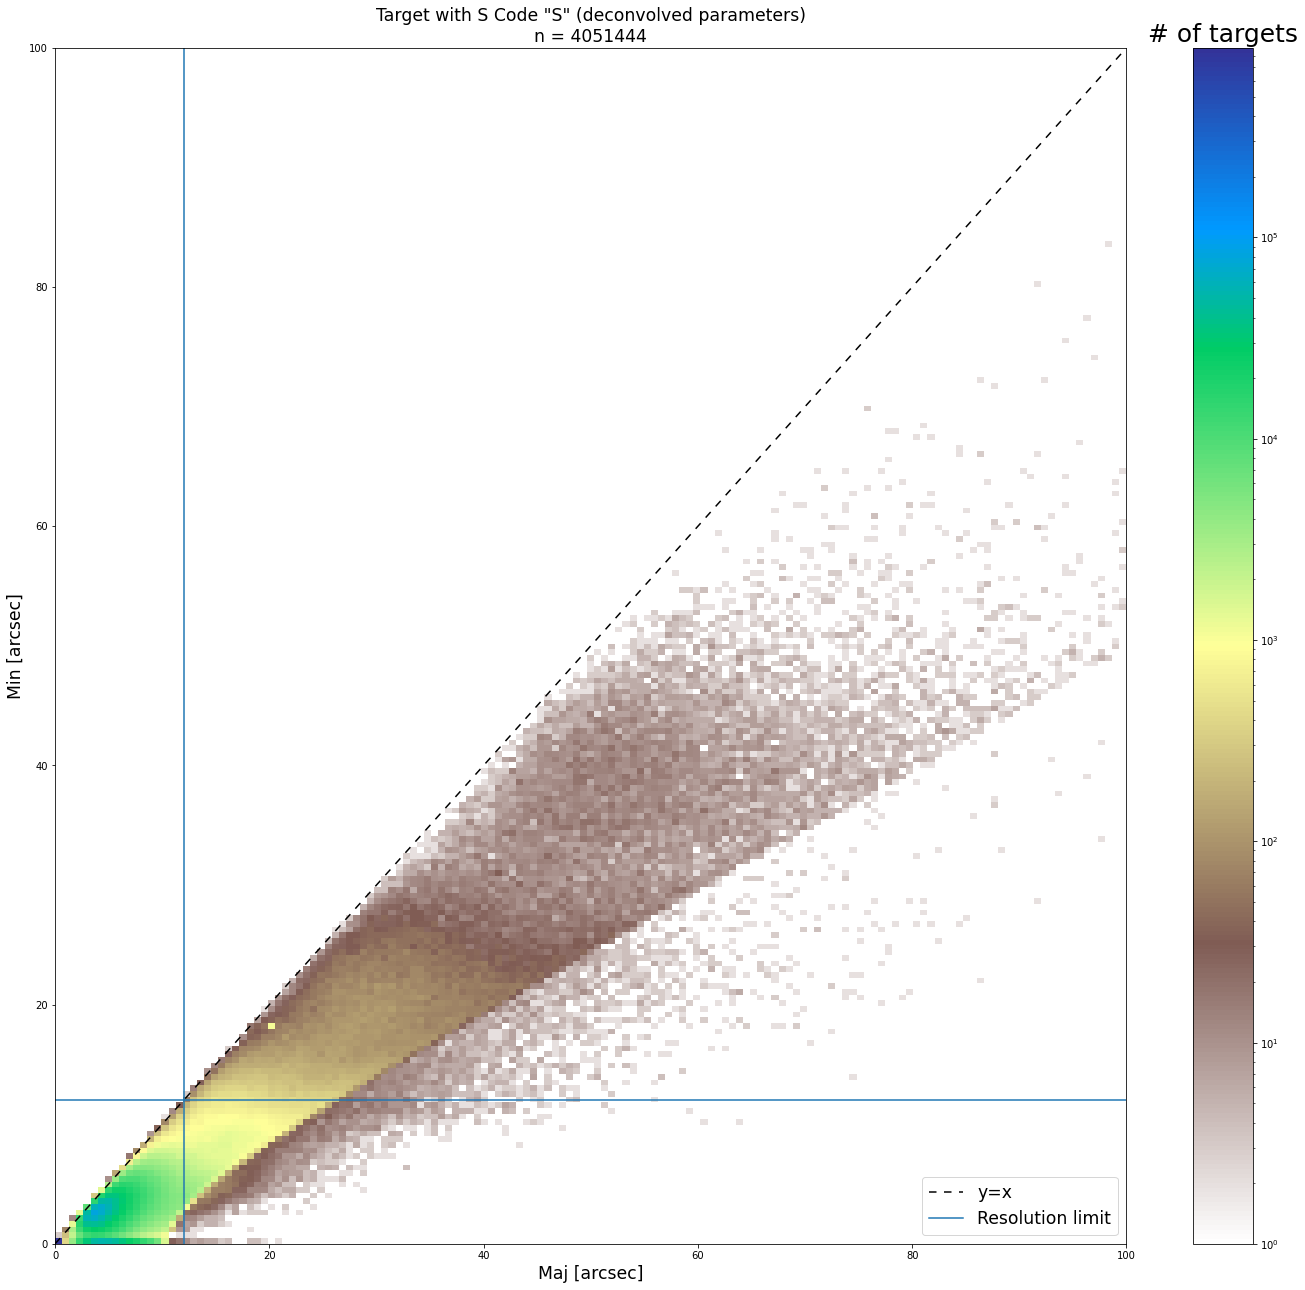

In [36]:
plt.figure(figsize=(24,22))
plt.hist2d(DC_Maj[S_Code=='S'], DC_Min[S_Code=='S'], bins=[bins_dcmaj_S, bins_dcmin_S], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.title('Target with S Code "S" (deconvolved parameters)\nn = %d'%(len(Maj[S_Code=='S'])), fontsize="xx-large")
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,100))
plt.ylim((0,100))
plt.legend(fontsize="xx-large")
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
#plt.savefig('fig/Maj_vs_min_hist.pdf')
plt.show()

In [37]:
bins_dcmin_C = np.linspace(DC_Min[S_Code=='C'].min(), DC_Min[S_Code=='C'].max(), 50)
bins_dcmaj_C = np.linspace(DC_Maj[S_Code=='C'].min(), DC_Maj[S_Code=='C'].max(), 50)

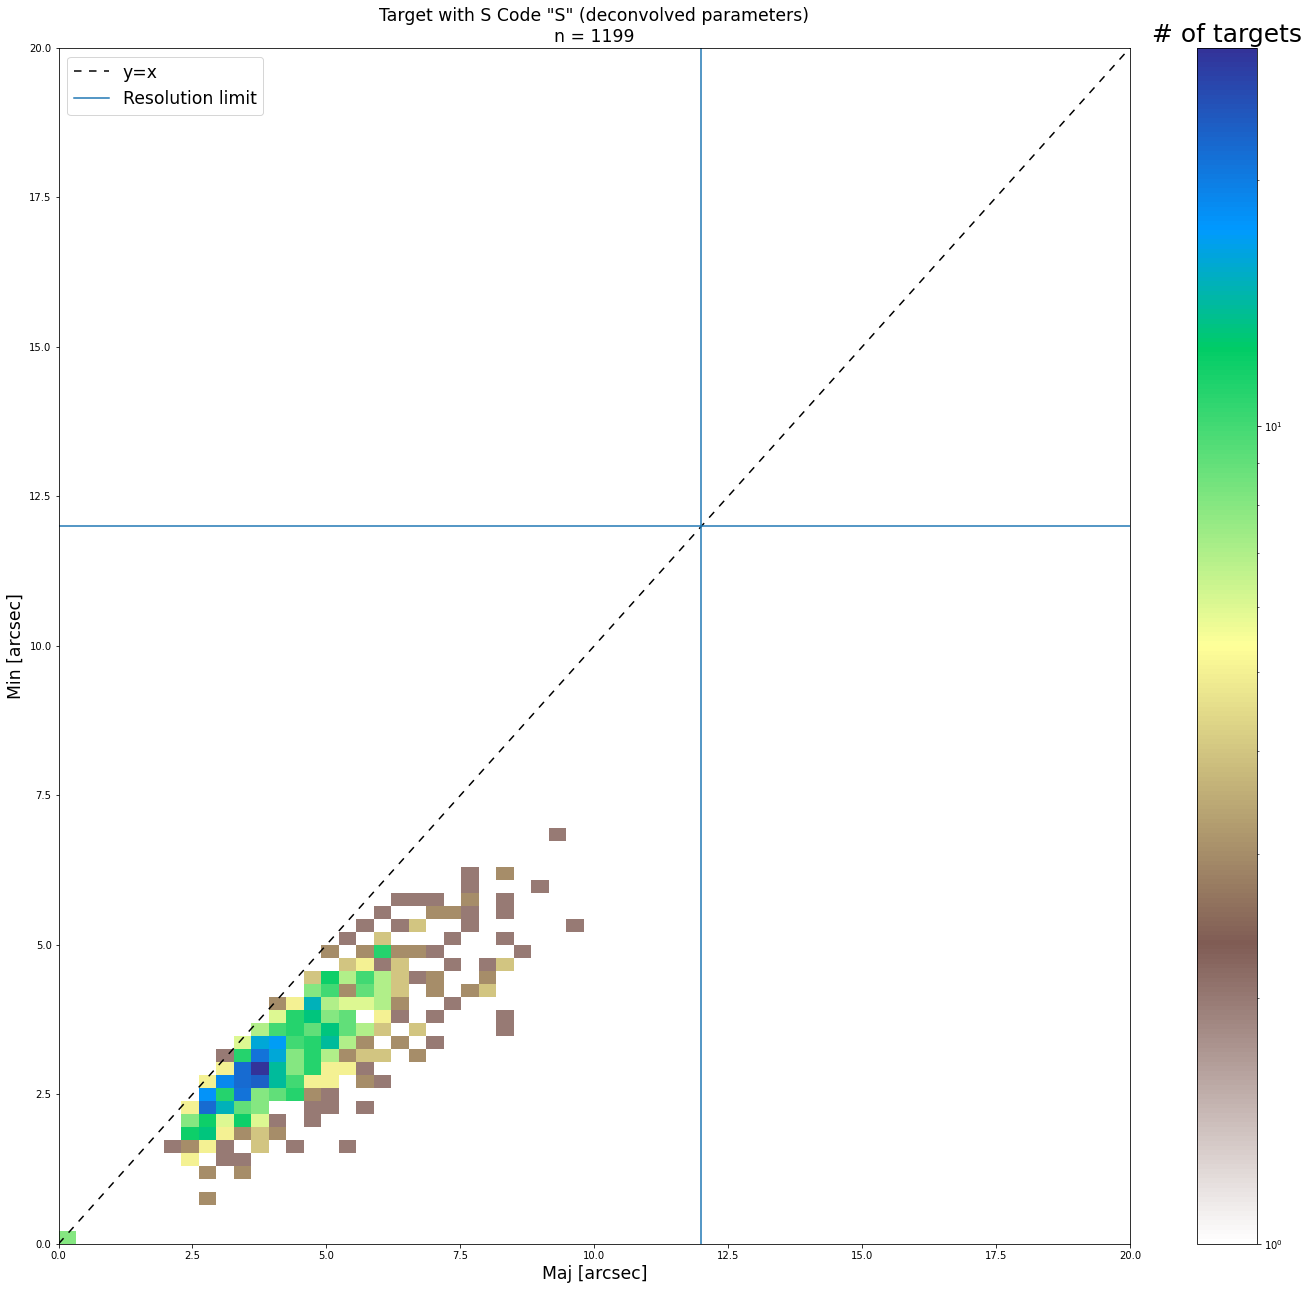

In [38]:
plt.figure(figsize=(24,22))
plt.hist2d(DC_Maj[S_Code=='C'], DC_Min[S_Code=='C'], bins=[bins_dcmaj_C, bins_dcmin_C], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.title('Target with S Code "S" (deconvolved parameters)\nn = %d'%(len(Maj[S_Code=='C'])), fontsize="xx-large")
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,20))
plt.ylim((0,20))
plt.legend(fontsize="xx-large")
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
#plt.savefig('fig/Maj_vs_min_hist.pdf')
plt.show()

In [39]:
bins_dcmin_M = np.linspace(DC_Min[S_Code=='M'].min(), DC_Min[S_Code=='M'].max(), 1000)
bins_dcmaj_M = np.linspace(DC_Maj[S_Code=='M'].min(), DC_Maj[S_Code=='M'].max(), 1000)

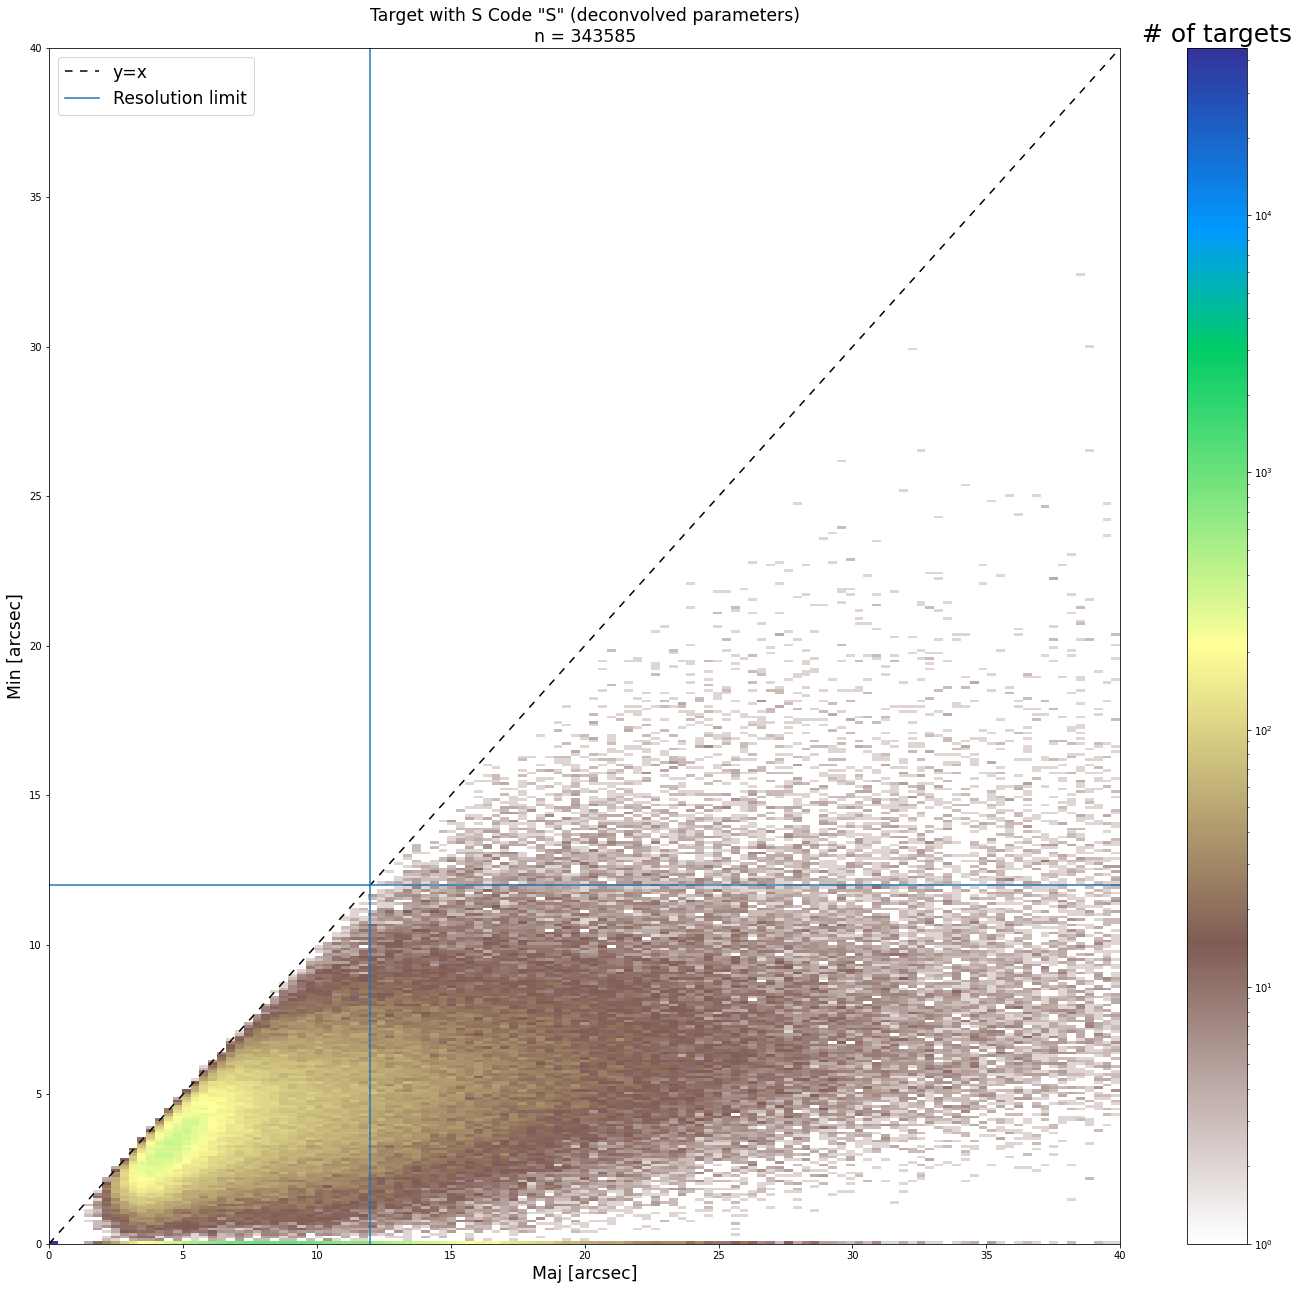

In [40]:
plt.figure(figsize=(24,22))
plt.hist2d(DC_Maj[S_Code=='M'], DC_Min[S_Code=='M'], bins=[bins_dcmaj_M, bins_dcmin_M], cmap='terrain_r', norm=matplotlib.colors.LogNorm())
clb=plt.colorbar()
clb.ax.set_title(label="# of targets",fontsize=25)
plt.title('Target with S Code "S" (deconvolved parameters)\nn = %d'%(len(Maj[S_Code=='M'])), fontsize="xx-large")
plt.axline((0, 0), slope=1, color="black", linestyle=(0, (5, 5)), label="y=x")
plt.axvline((resolution), label="Resolution limit")
plt.axhline((resolution))
plt.xlim((0,40))
plt.ylim((0,40))
plt.legend(fontsize="xx-large")
plt.xlabel("Maj [arcsec]", size='xx-large')
plt.ylabel("Min [arcsec]", size='xx-large')
#plt.savefig('fig/Maj_vs_min_hist.pdf')
plt.show()

In [41]:
#Convolved
nb_circ = len(Maj[Maj-Min<=1e-6])
print("{:.2} % of the targets are circular".format(100.*nb_circ/len(Maj)))

0.0027 % of the targets are circular


In [42]:
#De-convolved
nb_circ = len(DC_Maj[DC_Maj-DC_Min<=1e-6])
print("{:.3} % of the targets are circular".format(100.*nb_circ/len(DC_Maj)))

20.9 % of the targets are circular


In [43]:
bins_majmin = np.linspace((Maj-Min).min(), (Maj-Min).max(), 2000)

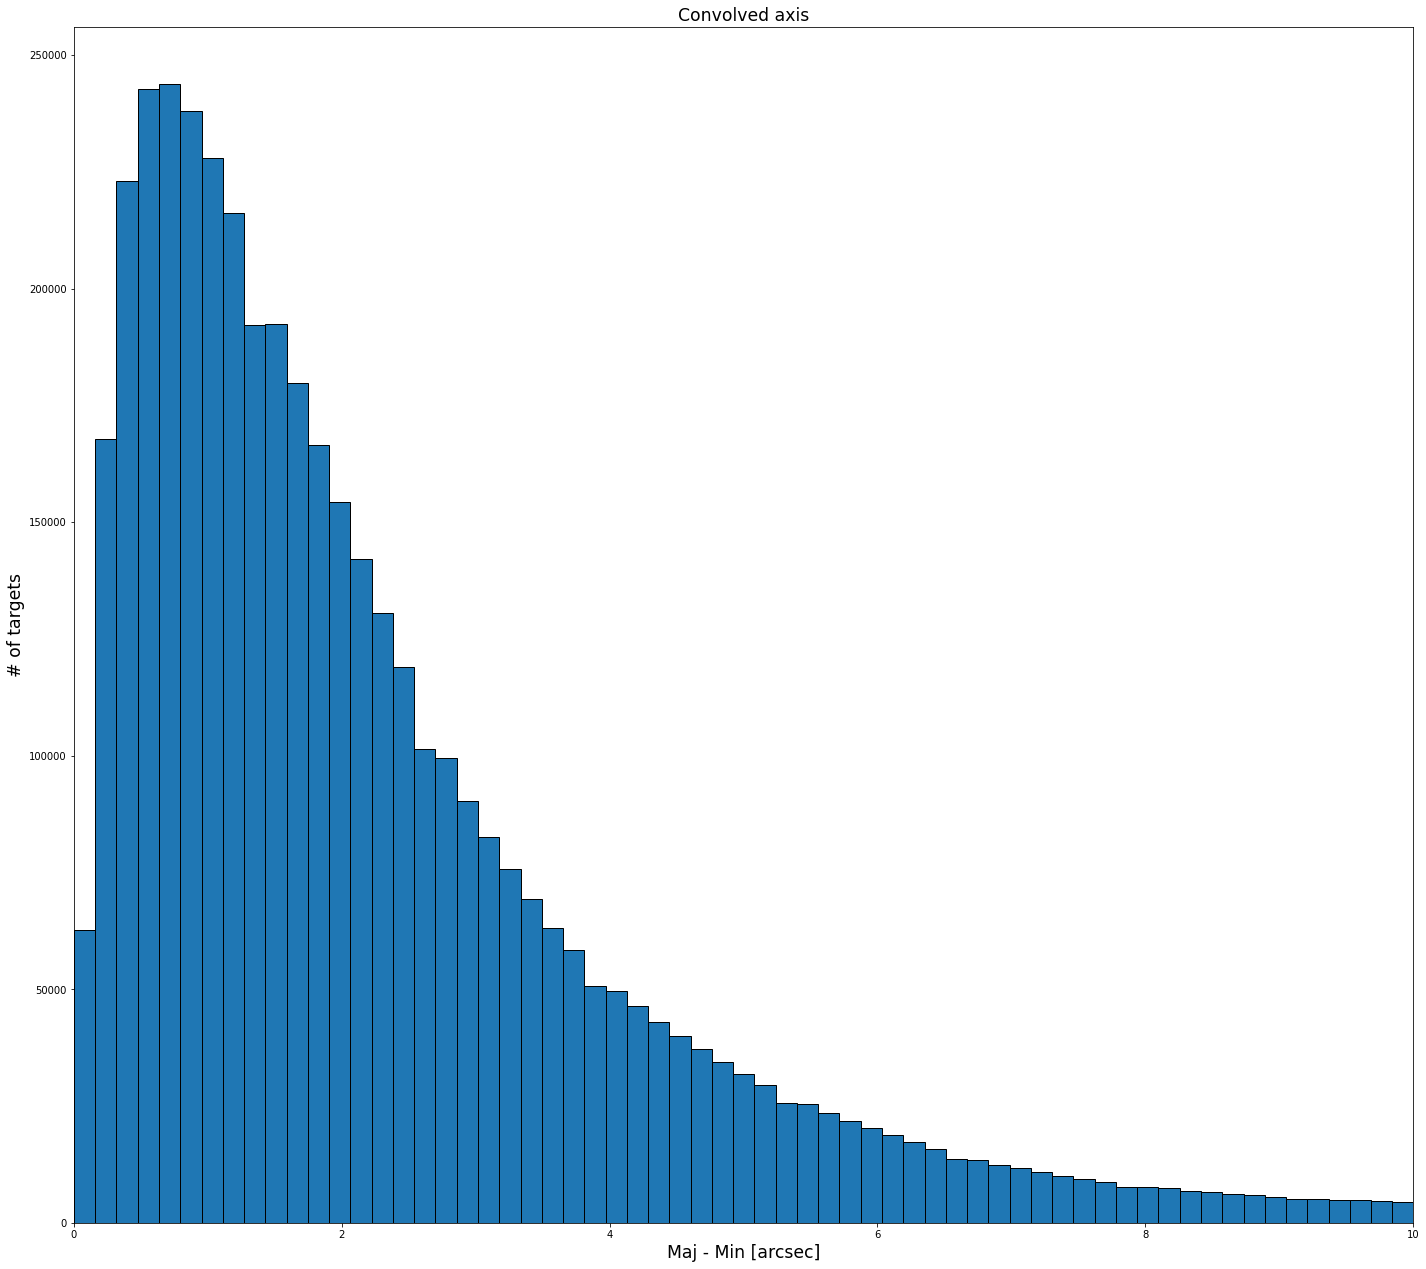

In [44]:
plt.figure(figsize=(24,22))
plt.title("Convolved axis", size='xx-large')
plt.hist(Maj-Min, bins=bins_majmin, edgecolor='black')
plt.xlabel("Maj - Min [arcsec]", size='xx-large')
plt.ylabel("# of targets", size='xx-large')
plt.xlim((0,10))
plt.show()

In [45]:
bins_dcmajmin = np.linspace((DC_Maj-DC_Min).min(), (DC_Maj-DC_Min).max(), 2000)

In [46]:
np.median(DC_Maj - DC_Min)

2.25

In [47]:
bins_dcmajmin[1]

0.15949974987493748

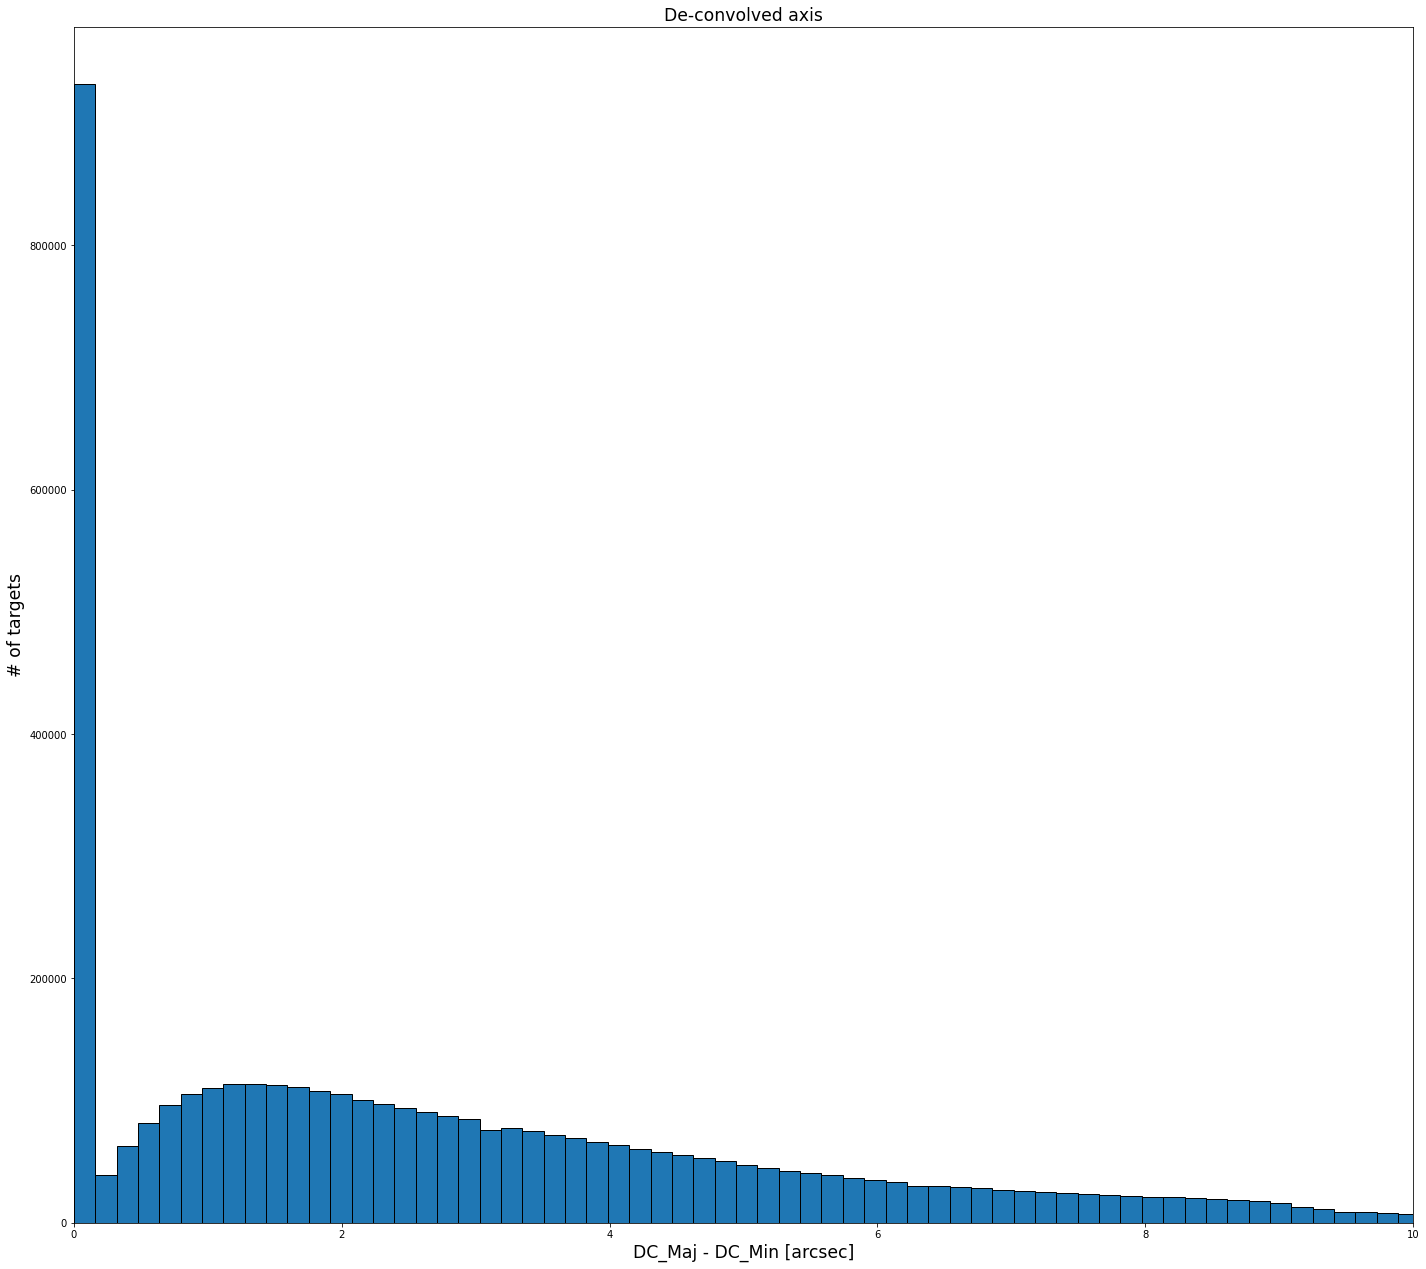

In [48]:
plt.figure(figsize=(24,22))
plt.title("De-convolved axis", size='xx-large')
plt.hist(DC_Maj-DC_Min, bins=bins_dcmajmin, edgecolor='black')
plt.xlabel("DC_Maj - DC_Min [arcsec]", size='xx-large')
plt.ylabel("# of targets", size='xx-large')
plt.xlim((0,10))
plt.show()

In [49]:
Source_Name

array(['ILTJ112142.68+465542.0', 'ILTJ112144.88+471503.6',
       'ILTJ112142.41+465914.9', ..., 'ILTJ182552.31+335432.5',
       'ILTJ182453.39+341352.2', 'ILTJ182409.84+351625.1'], dtype='<U23')

In [50]:
print("Interresting targets to check :\n")
for i in range(0,5):
    print("Target %d"%(i+1))
    print("Name : ",Source_Name[np.logical_and(np.logical_and(Maj>6.75, Maj<7.5), np.logical_and(Min>6, Min<7))][i])
    print("S code : ",S_Code[np.logical_and(np.logical_and(Maj>6.75, Maj<7.5), np.logical_and(Min>6, Min<7))][i])
    print("RA : ",RA[np.logical_and(np.logical_and(Maj>6.75, Maj<7.5), np.logical_and(Min>6, Min<7))][i])
    print("DEC : ",DEC[np.logical_and(np.logical_and(Maj>6.75, Maj<7.5), np.logical_and(Min>6, Min<7))][i])
    print("Maj :", Maj[np.logical_and(np.logical_and(Maj>6.75, Maj<7.5), np.logical_and(Min>6, Min<7))][i])
    print("Min :", Min[np.logical_and(np.logical_and(Maj>6.75, Maj<7.5), np.logical_and(Min>6, Min<7))][i])
    print("\n")

Interresting targets to check :

Target 1
Name :  ILTJ112135.64+470737.1
S code :  S
RA :  170.3985
DEC :  47.126979999999996
Maj : 7.47
Min : 6.46


Target 2
Name :  ILTJ112132.70+470053.2
S code :  S
RA :  170.38626000000002
DEC :  47.01478
Maj : 7.26
Min : 6.91


Target 3
Name :  ILTJ112130.98+472330.7
S code :  S
RA :  170.37908000000002
DEC :  47.391870000000004
Maj : 6.8
Min : 6.07


Target 4
Name :  ILTJ112128.45+472627.2
S code :  S
RA :  170.36855
DEC :  47.440909999999995
Maj : 6.9
Min : 6.12


Target 5
Name :  ILTJ112132.46+475911.9
S code :  S
RA :  170.38523
DEC :  47.98665
Maj : 7.21
Min : 6.04




Calculated with the function "calc_axis" in "MosaicInsight.py"

ILTJ112135.64+470737.1 : 7.22, 6.64

ILTJ112132.70+470053.2 : 7.59, 7.27

ILTJ112130.98+472330.7 : 6.75, 6.67

ILTJ112128.45+472627.2 : 7.20, 6.71

ILTJ112132.46+475911.9 : 7.41, 6.99

In [51]:
bins = np.linspace(np.log10(Total_flux).min(), np.log10(Total_flux).max(), nbins2)

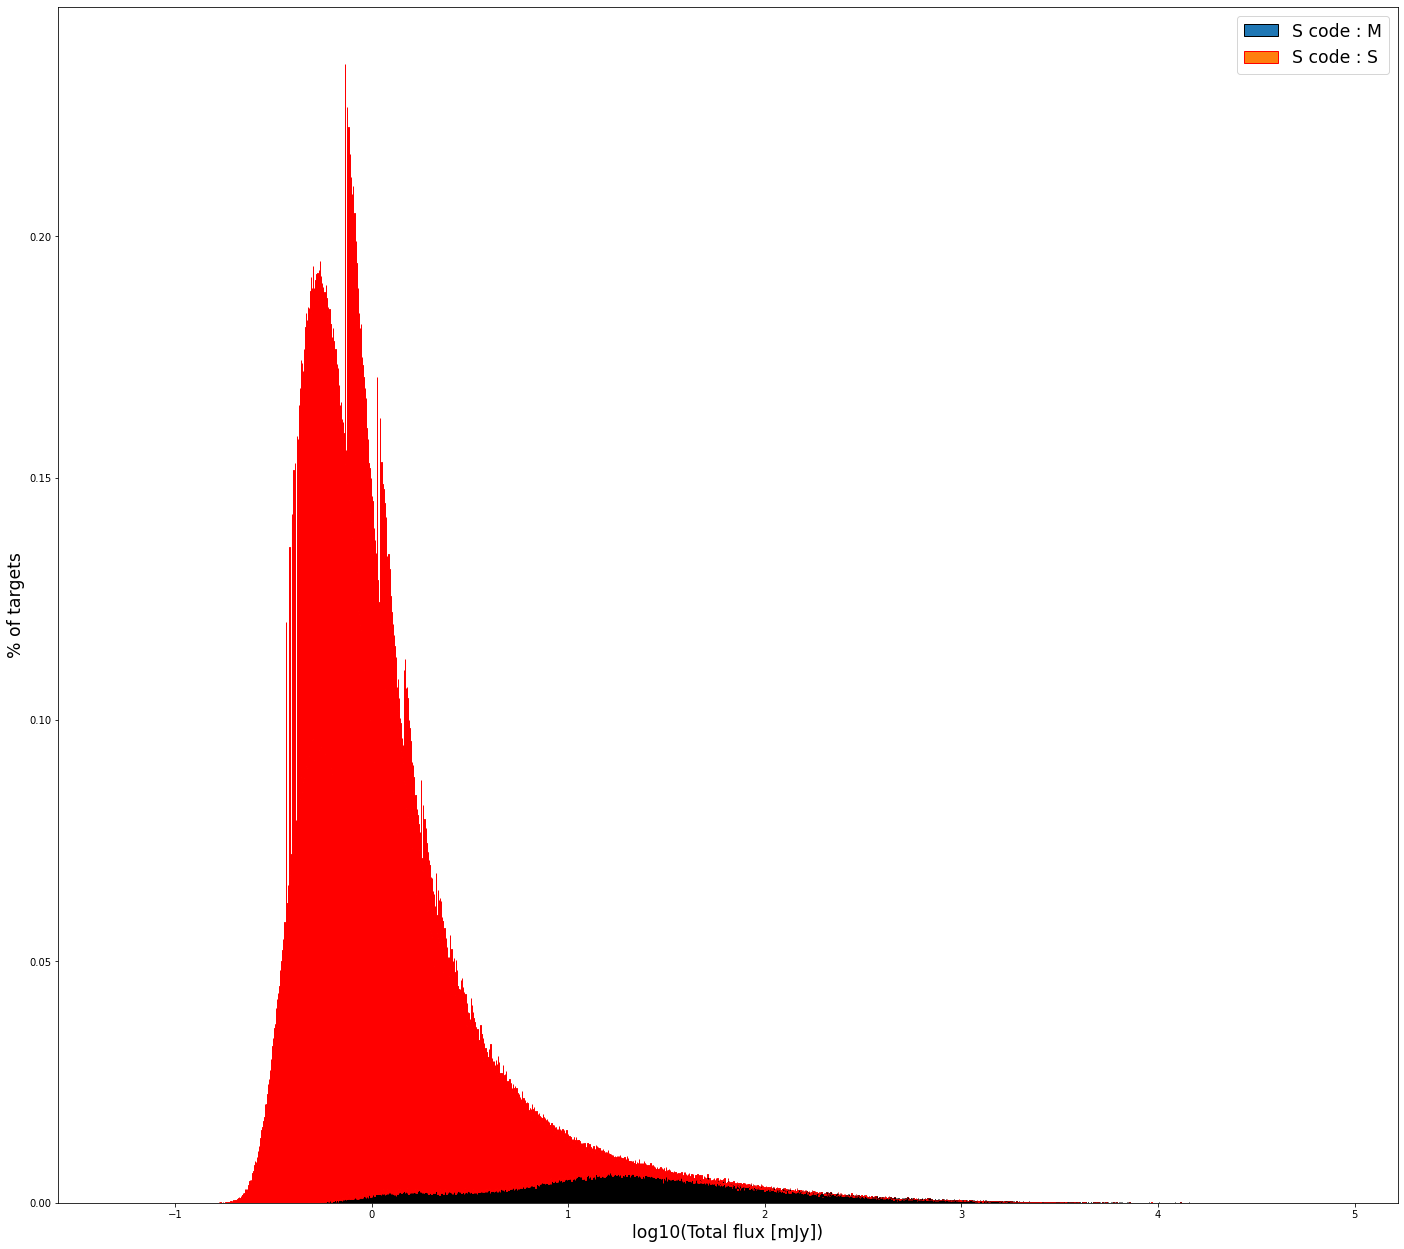

In [52]:
hist_S, _ = np.histogram(np.log10(Total_flux[S_Code=='S']), bins)
norm_histS = 100*hist_S/len(Total_flux)
hist_M, _ = np.histogram(np.log10(Total_flux[S_Code=='M']), bins)
norm_histM = 100*hist_M/len(Total_flux)

plt.figure(figsize=(24,22))
plt.bar(bins[:-1],norm_histM, edgecolor='black', width=(bins[1:]-bins[:-1]).mean(), label='S code : M')
plt.bar(bins[:-1],norm_histS, bottom=norm_histM, edgecolor='red', width=(bins[1:]-bins[:-1]).mean(), label='S code : S')
plt.xlabel("log10(Total flux [mJy])", size='xx-large')
plt.ylabel("% of targets", size='xx-large')
plt.legend(fontsize="xx-large")
#plt.savefig('fig/flux_hist_5.pdf')
plt.show()

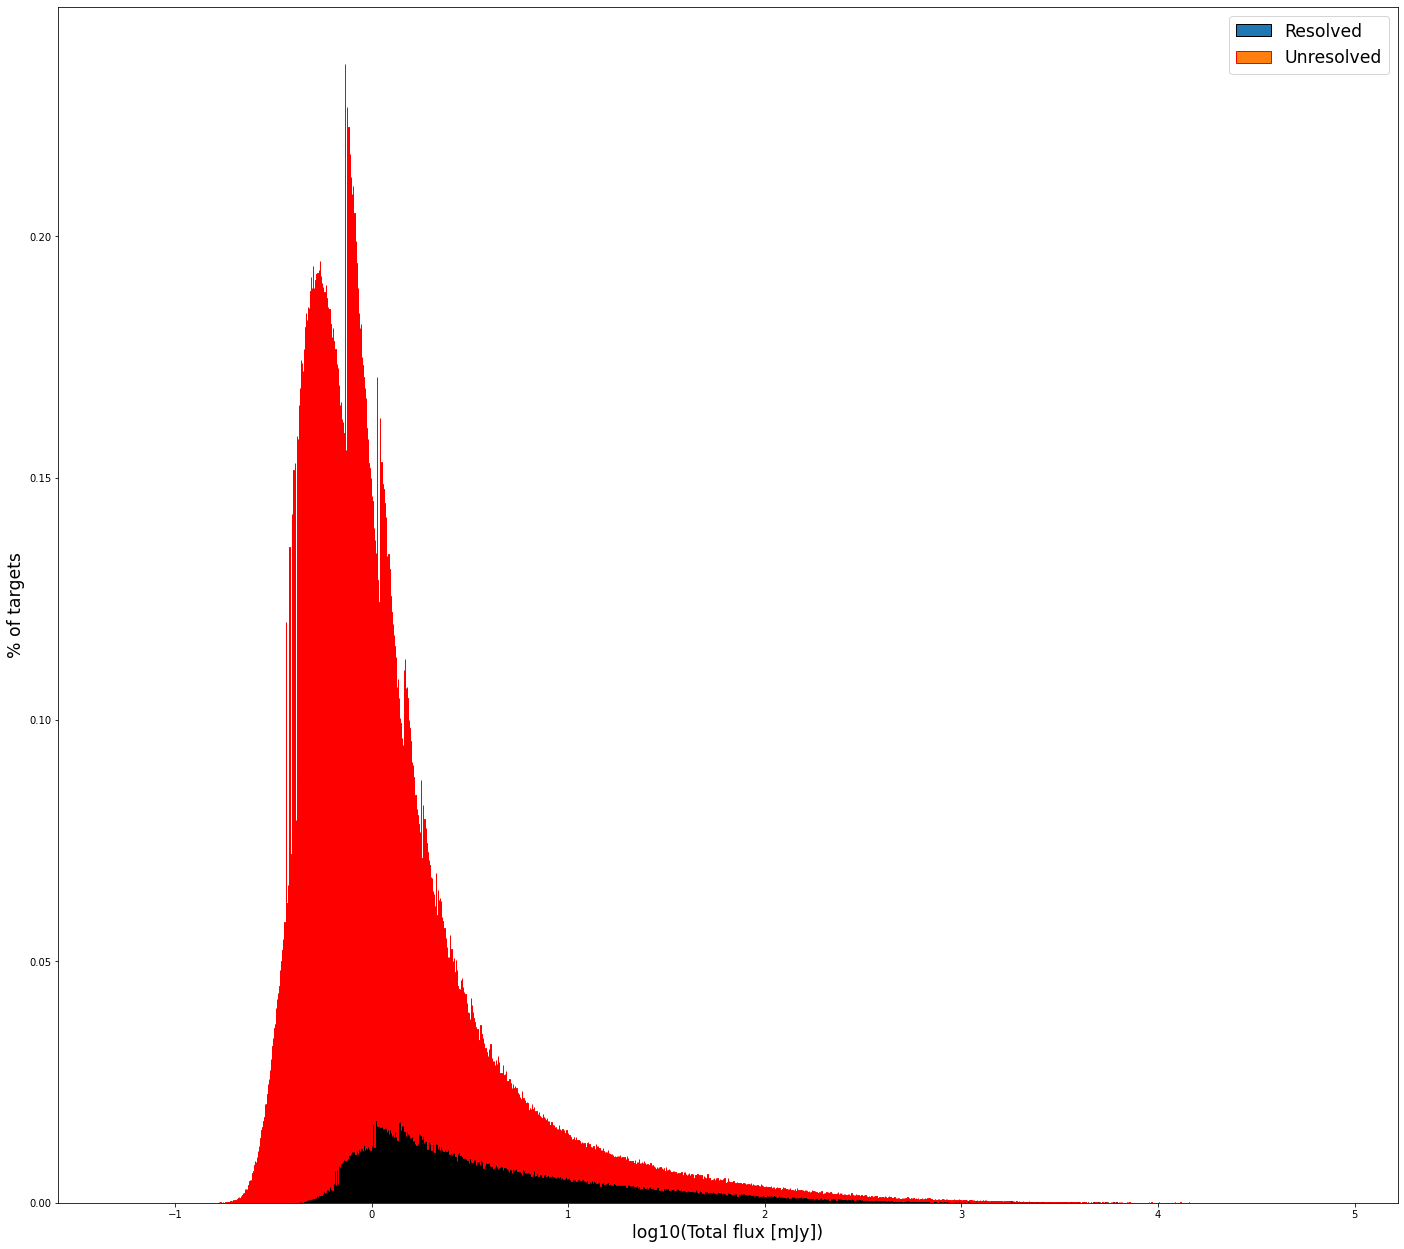

In [53]:
hist_nores, _ = np.histogram(np.log10(Total_flux[Maj<12]), bins)
norm_hist_nores = 100*hist_nores/len(Total_flux)
hist_res, _ = np.histogram(np.log10(Total_flux[Maj>=12]), bins)
norm_hist_res = 100*hist_res/len(Total_flux)

plt.figure(figsize=(24,22))
plt.bar(bins[:-1],norm_hist_res, edgecolor='black', width=(bins[1:]-bins[:-1]).mean(), label='Resolved')
plt.bar(bins[:-1],norm_hist_nores, bottom=norm_hist_res, edgecolor='red', width=(bins[1:]-bins[:-1]).mean(), label='Unresolved')
plt.xlabel("log10(Total flux [mJy])", size='xx-large')
plt.ylabel("% of targets", size='xx-large')
plt.legend(fontsize="xx-large")
#plt.savefig('fig/flux_hist_6.pdf')
plt.show()